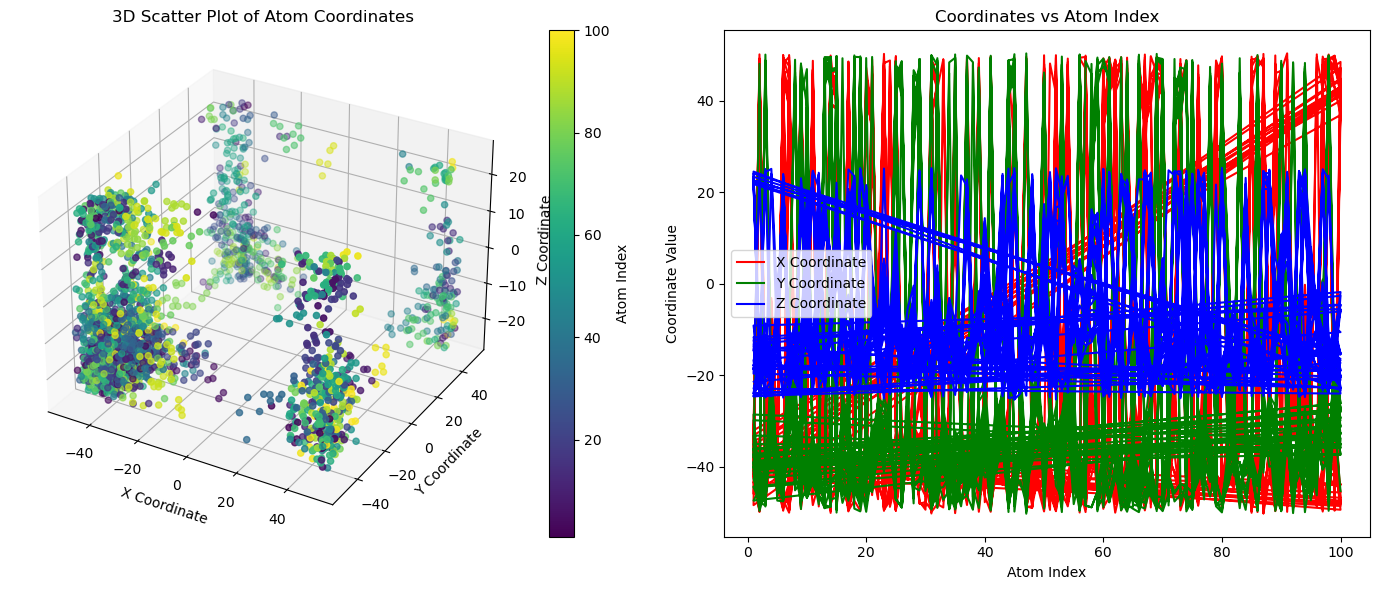

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data from the file
data = np.loadtxt("coord.dat")

# Extract columns: atom index and x, y, z coordinates
atom_index = data[:, 1]
x_coords = data[:, 2]
y_coords = data[:, 3]
z_coords = data[:, 4]

# Create a 3D scatter plot
fig = plt.figure(figsize=(14, 6))

# 3D Scatter Plot of x, y, z coordinates
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter(x_coords, y_coords, z_coords, c=atom_index, cmap='viridis', marker='o')
ax.set_title("3D Scatter Plot of Atom Coordinates")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_zlabel("Z Coordinate")
fig.colorbar(scatter, ax=ax, label='Atom Index')

# Line plot of x, y, and z coordinates vs atom index
ax2 = fig.add_subplot(122)
ax2.plot(atom_index, x_coords, label='X Coordinate', color='r')
ax2.plot(atom_index, y_coords, label='Y Coordinate', color='g')
ax2.plot(atom_index, z_coords, label='Z Coordinate', color='b')
ax2.set_title("Coordinates vs Atom Index")
ax2.set_xlabel("Atom Index")
ax2.set_ylabel("Coordinate Value")
ax2.legend()

plt.tight_layout()
plt.show()


In [16]:
data[:,3]

array([-16.4753685 , -33.63646317,  39.87081528,  31.86639977,
       -13.22975254, -48.21281052,  26.21012688, -38.61767197,
        44.83344269, -39.54844666,  26.14359093, -27.58012009,
       -43.52317429,  43.4822464 , -48.51207733, -19.32457161,
       -45.39871216,  42.95635223,   8.09406853, -44.91402817,
       -48.63732529, -43.36991119, -37.73330688, -28.99528885,
        31.12199402, -41.95713043, -42.711483  , -25.121418  ,
       -35.03873062, -45.42729187,  18.0531826 , -34.67009354,
       -47.96501923,  46.85458374, -38.16675949, -34.30508804,
       -43.14185333, -20.26929855,  44.33857727, -26.41996765,
       -33.20756149, -30.21492767,  47.93689346, -45.66069412,
       -19.37364578, -33.04204559, -36.82344055, -20.9932766 ,
       -14.06022072,  -7.14168596,  47.79251099, -36.4439888 ,
       -22.1280098 , -44.63370514,  38.96903992, -19.02010155,
       -44.90311813,  35.99207306, -41.05653763,  48.30751801,
       -23.05492401, -30.49098587, -25.95401764,  25.79

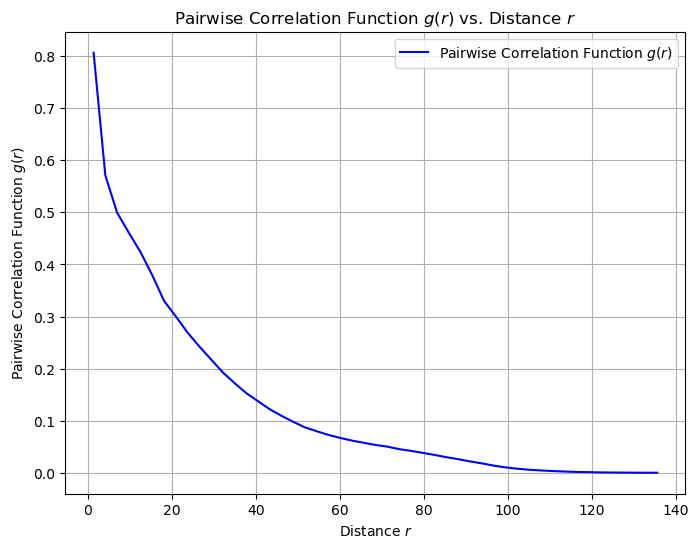

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Load the data
data = np.loadtxt('coord1.dat')
x_coords = data[:, 2]
y_coords = data[:, 3]
z_coords = data[:, 4]

# Number of atoms and density estimation
num_atoms = len(x_coords)
density = num_atoms / ((np.ptp(x_coords) * np.ptp(y_coords) * np.ptp(z_coords)))  # estimate density

# Calculate pairwise distances
pairwise_distances = pdist(np.column_stack((x_coords, y_coords, z_coords)))

# Define bins for the histogram
bin_edges = np.linspace(0, np.max(pairwise_distances), 50)
dr = bin_edges[1] - bin_edges[0]

# Compute histogram (count of pairs within each spherical shell)
hist, bin_edges = np.histogram(pairwise_distances, bins=bin_edges)
r_values = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Volume of each spherical shell
shell_volumes = 4 * np.pi * (r_values**2) * dr

# Calculate g(r)
g_r = hist / (shell_volumes * density * num_atoms)

# Plot g(r) vs. r
plt.figure(figsize=(8, 6))
plt.plot(r_values, g_r, label="Pairwise Correlation Function $g(r)$", color='b')
plt.xlabel("Distance $r$")
plt.ylabel("Pairwise Correlation Function $g(r)$")
plt.title("Pairwise Correlation Function $g(r)$ vs. Distance $r$")
plt.legend()
plt.grid()
plt.show()


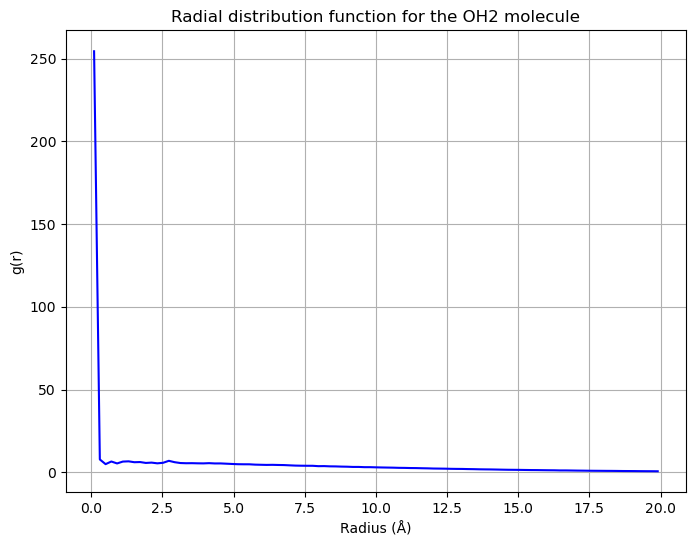

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Load the data
data = np.loadtxt('coord.dat')
x_coords = data[:, 2]
y_coords = data[:, 3]
z_coords = data[:, 4]

# Number of atoms and density estimation
num_atoms = len(x_coords)
density = num_atoms / ((np.ptp(x_coords) * np.ptp(y_coords) * np.ptp(z_coords)))  # estimate density

# Calculate pairwise distances
pairwise_distances = pdist(np.column_stack((x_coords, y_coords, z_coords)))

# Define bin edges to match the desired range up to 20 Å with appropriate bin width
bin_edges = np.linspace(0, 20, 100)  # 100 bins for higher resolution within 20 Å
dr = bin_edges[1] - bin_edges[0]

# Compute histogram (count of pairs within each spherical shell)
hist, bin_edges = np.histogram(pairwise_distances, bins=bin_edges)
r_values = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Volume of each spherical shell
shell_volumes = 4 * np.pi * (r_values**2) * dr

# Calculate g(r)
g_r = hist / (shell_volumes * density * num_atoms)

# Plot g(r) vs. r to match the target style
plt.figure(figsize=(8, 6))
plt.plot(r_values, g_r, label="Radial distribution function for the OH2 molecule", color='b')
plt.xlabel("Radius (Å)")
plt.ylabel("g(r)")
plt.title("Radial distribution function for the OH2 molecule")
plt.grid(True)
plt.show()


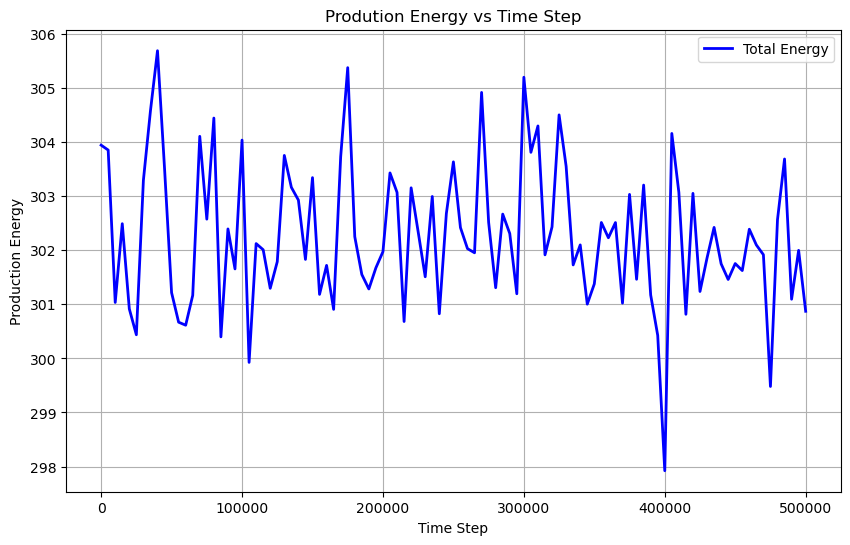

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to read and clean the data
def load_energy_data(filename):
    # Open the file and parse each line
    data = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("ENERGY:"):
                # Split the line, ignore "ENERGY:", and convert the rest to floats
                values = line.split()[1:]
                data.append([float(val) for val in values])
    return np.array(data)

# Load the cleaned data
data = load_energy_data('prod_ener.txt')

# Extract the columns for Time Step and Total Energy
time_step = data[:, 0]    # Column 1 is Time Step
total_energy = data[:, 11]  # Column 12 is Total Energy

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_step, total_energy, label='Total Energy', color='blue', lw=2)
plt.xlabel('Time Step')
plt.ylabel('Production Energy')
plt.title('Prodution Energy vs Time Step')
plt.grid(True)
plt.legend()
plt.savefig('energy_plot.png')  # Save plot as PNG file
plt.show()


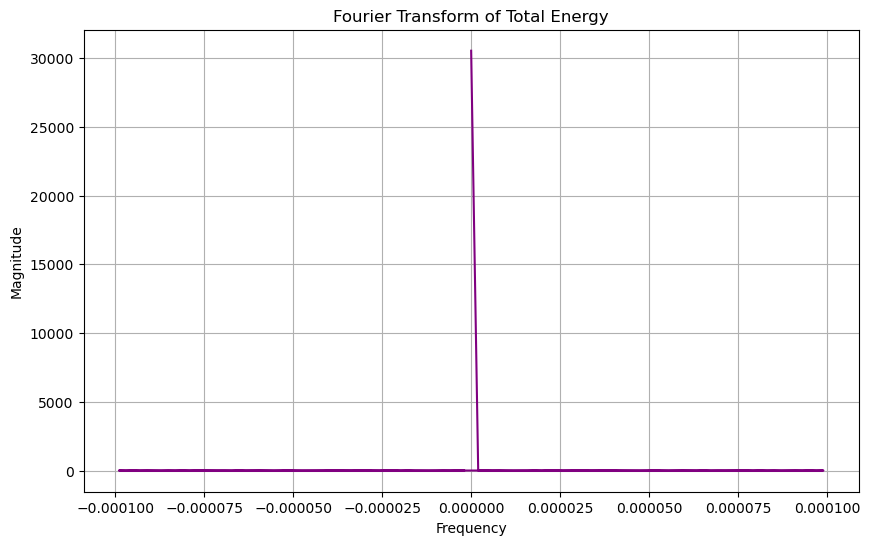

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to read and clean the data
def load_energy_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("ENERGY:"):
                values = line.split()[1:]
                data.append([float(val) for val in values])
    return np.array(data)

# Load the data
data = load_energy_data('prod_ener.txt')

# Extract time step and total energy
time_step = data[:, 0]
total_energy = data[:, 11]

# Perform FFT on the total energy
energy_fft = np.fft.fft(total_energy)
frequencies = np.fft.fftfreq(len(total_energy), d=(time_step[1] - time_step[0]))

# Plot the magnitude of the Fourier transform
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(energy_fft), color='purple')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Total Energy')
plt.grid(True)
plt.show()


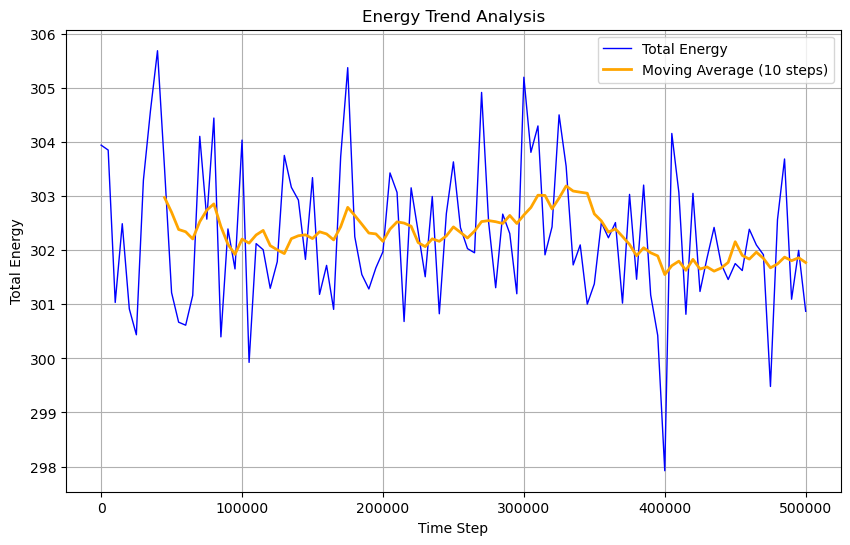

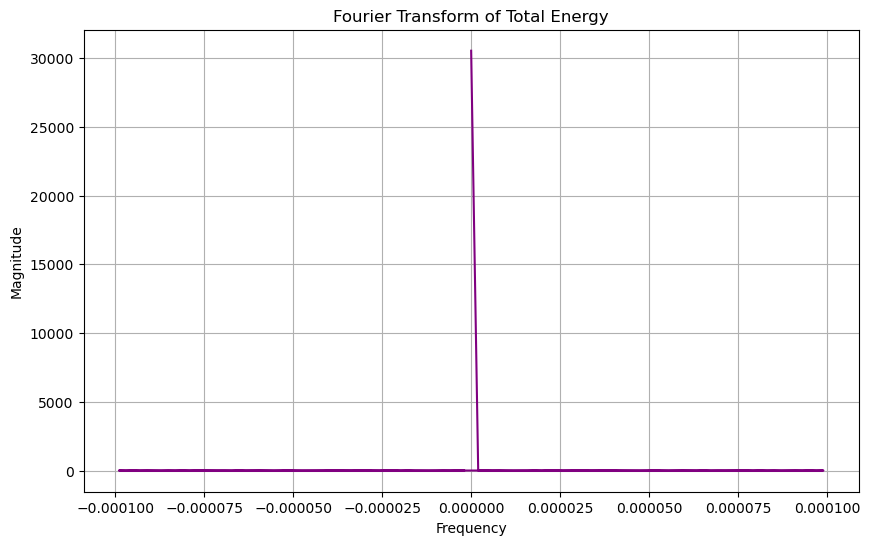

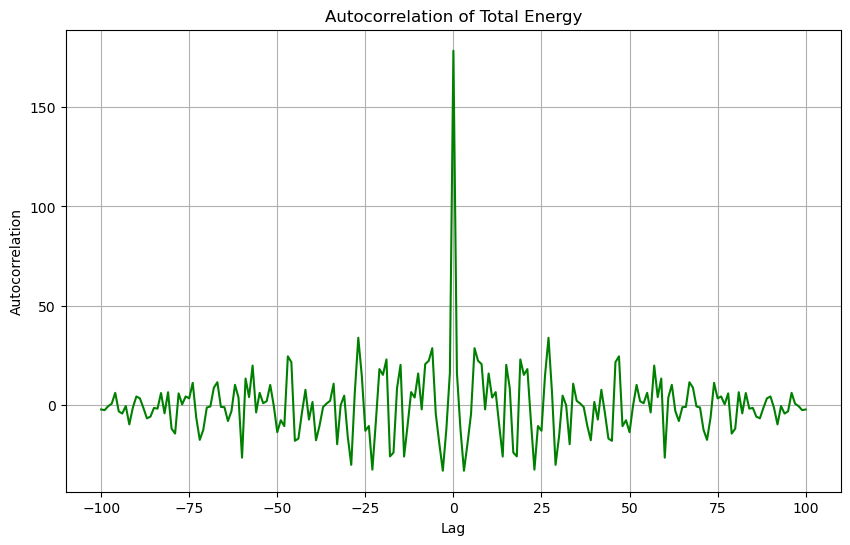

Mean Total Energy: 302.27101881188116
Variance of Total Energy: 1.7672740203391823
Approximate Bond Energy: 1.0520537790412687
Approximate Bond Strength (Range of Fluctuations): 4.3308999999999855


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import correlate

# Load data function
def load_energy_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("ENERGY:"):
                values = line.split()[1:]
                data.append([float(val) for val in values])
    return np.array(data)

# Load and extract relevant data
data = load_energy_data('prod_ener.txt')
time_step = data[:, 0]
total_energy = data[:, 11]

# 1. Energy Trend Analysis
mean_energy = np.mean(total_energy)
variance_energy = np.var(total_energy)

# Moving Average (window size of 10 steps for example)
window_size = 10
moving_avg_energy = np.convolve(total_energy, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(10, 6))
plt.plot(time_step, total_energy, label='Total Energy', color='blue', lw=1)
plt.plot(time_step[window_size-1:], moving_avg_energy, label='Moving Average (10 steps)', color='orange', lw=2)
plt.xlabel('Time Step')
plt.ylabel('Total Energy')
plt.title('Energy Trend Analysis')
plt.grid(True)
plt.legend()
plt.show()

# 2. Frequency Analysis (Fourier Transform)
energy_fft = fft(total_energy)
frequencies = fftfreq(len(total_energy), d=(time_step[1] - time_step[0]))

plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(energy_fft), color='purple')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Total Energy')
plt.grid(True)
plt.show()

# 3. Autocorrelation Analysis
autocorrelation = correlate(total_energy - mean_energy, total_energy - mean_energy, mode='full')
lags = np.arange(-len(total_energy) + 1, len(total_energy))

plt.figure(figsize=(10, 6))
plt.plot(lags, autocorrelation, color='green')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Total Energy')
plt.grid(True)
plt.show()

# 4. Bond Energy and Bond Strength Estimation (Simplified)
# Estimate fluctuations as a proxy for bond stability
fluctuations = total_energy - mean_energy
bond_energy = np.mean(np.abs(fluctuations))
bond_strength = np.max(np.abs(fluctuations)) - np.min(np.abs(fluctuations))

print(f"Mean Total Energy: {mean_energy}")
print(f"Variance of Total Energy: {variance_energy}")
print(f"Approximate Bond Energy: {bond_energy}")
print(f"Approximate Bond Strength (Range of Fluctuations): {bond_strength}")


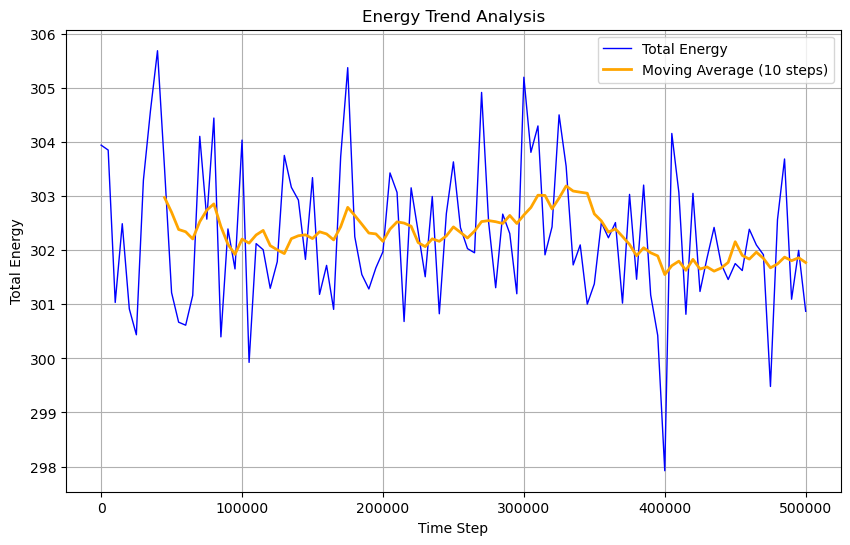

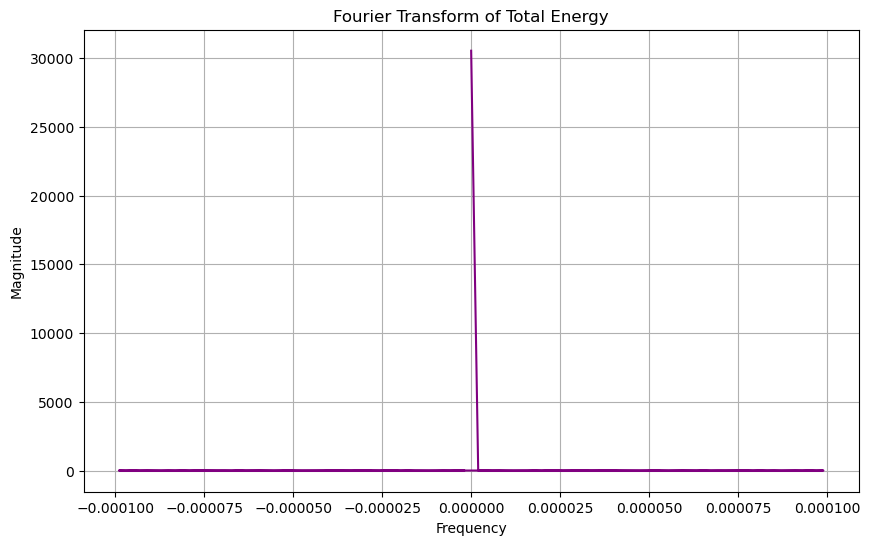

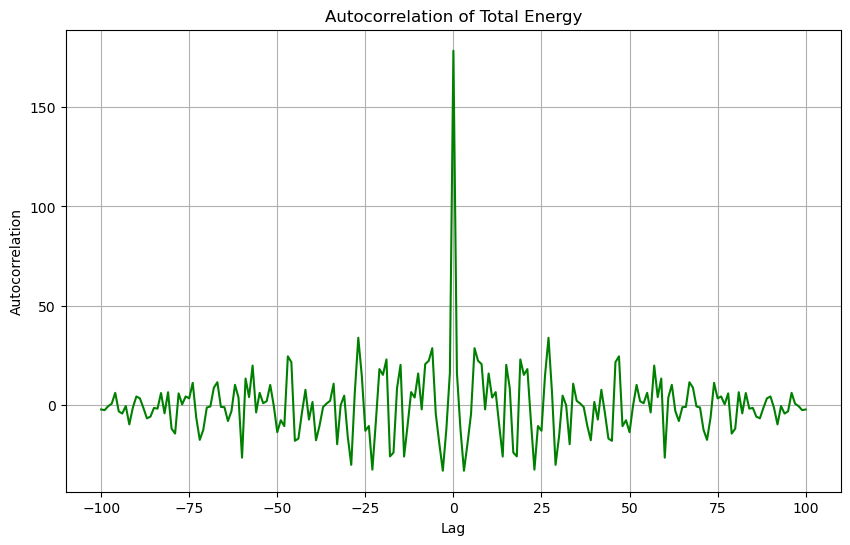

Mean Total Energy: 302.27101881188116
Variance of Total Energy: 1.7672740203391823
Approximate Bond Energy (kJ/mol): 6.335467857386521e+20
Approximate Bond Strength (Range of Fluctuations): 4.3308999999999855


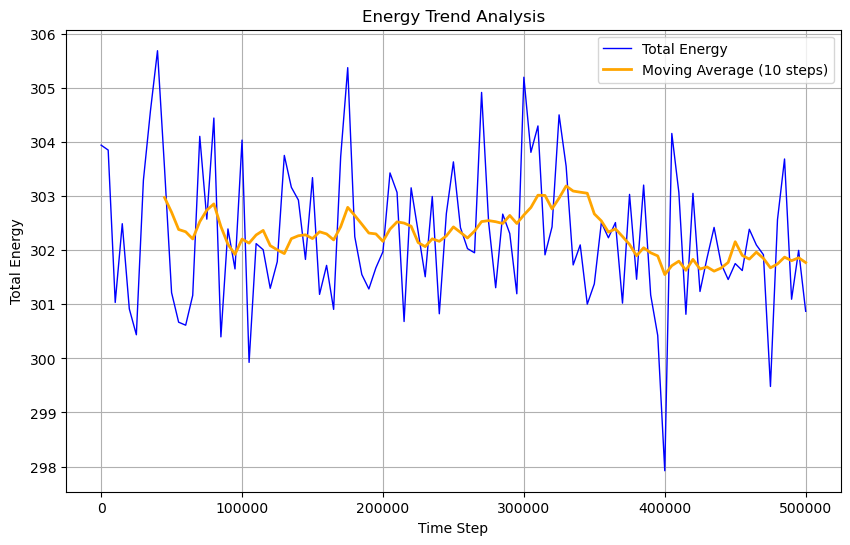

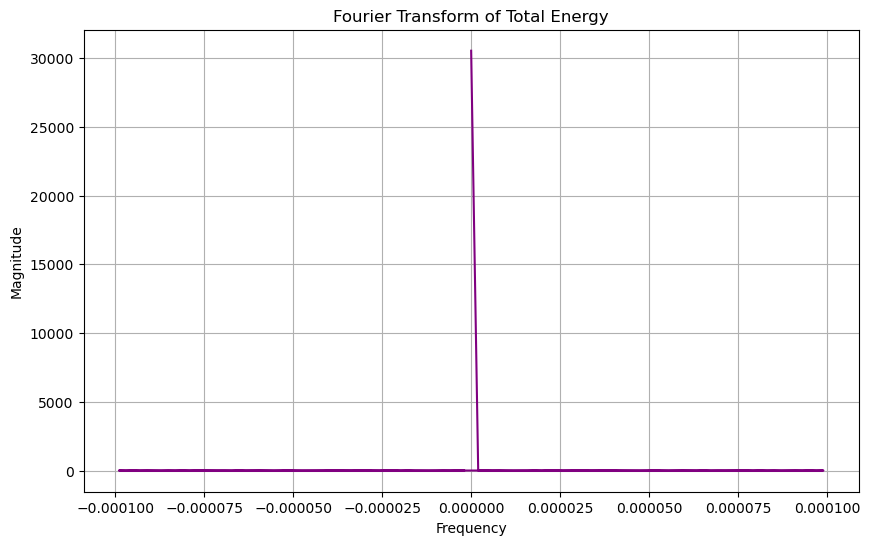

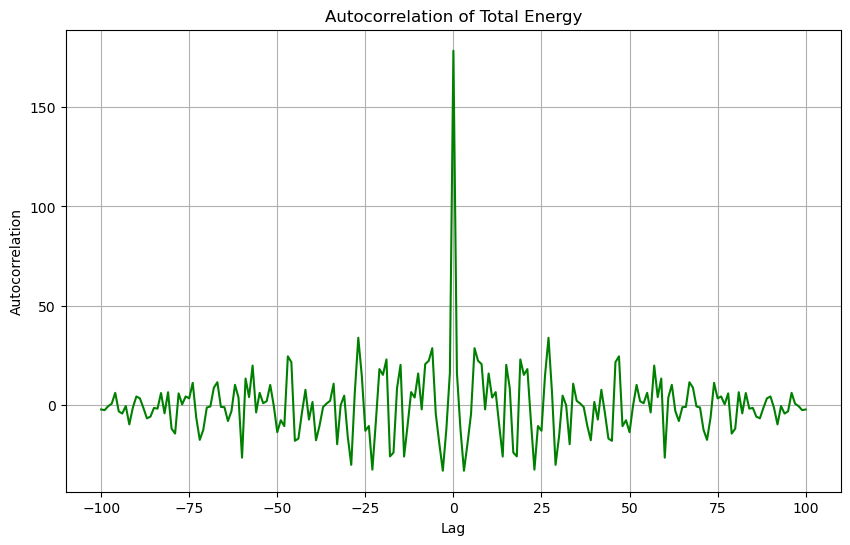

Mean Total Energy: 302.27101881188116
Variance of Total Energy: 1.7672740203391823
Approximate Bond Energy (kJ/mol): 6.335467857386521e+20
Approximate Bond Strength (Range of Fluctuations): 4.3308999999999855


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import correlate

# Load data function
def load_energy_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("ENERGY:"):
                values = line.split()[1:]
                data.append([float(val) for val in values])
    return np.array(data)

# Load and extract relevant data
data = load_energy_data('prod_ener.txt')
time_step = data[:, 0]
total_energy = data[:, 11]

# 1. Energy Trend Analysis
mean_energy = np.mean(total_energy)
variance_energy = np.var(total_energy)

# Moving Average (window size of 10 steps for example)
window_size = 10
moving_avg_energy = np.convolve(total_energy, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(10, 6))
plt.plot(time_step, total_energy, label='Total Energy', color='blue', lw=1)
plt.plot(time_step[window_size-1:], moving_avg_energy, label='Moving Average (10 steps)', color='orange', lw=2)
plt.xlabel('Time Step')
plt.ylabel('Total Energy')
plt.title('Energy Trend Analysis')
plt.grid(True)
plt.legend()
plt.show()

# 2. Frequency Analysis (Fourier Transform)
energy_fft = fft(total_energy)
frequencies = fftfreq(len(total_energy), d=(time_step[1] - time_step[0]))

plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(energy_fft), color='purple')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Total Energy')
plt.grid(True)
plt.show()

# 3. Autocorrelation Analysis
autocorrelation = correlate(total_energy - mean_energy, total_energy - mean_energy, mode='full')
lags = np.arange(-len(total_energy) + 1, len(total_energy))

plt.figure(figsize=(10, 6))
plt.plot(lags, autocorrelation, color='green')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Total Energy')
plt.grid(True)
plt.show()

# 4. Bond Energy and Bond Strength Estimation (Simplified)
# Estimate fluctuations as a proxy for bond stability
fluctuations = total_energy - mean_energy

# Average fluctuation in total energy (in Joules)
bond_energy = np.mean(np.abs(fluctuations))

# Convert the bond energy to kJ/mol using Avogadro's number and scaling
NA = 6.022e23  # Avogadro's number (mol^-1)
bond_energy_kJmol = bond_energy * NA * 1e-3  # Convert to kJ/mol

# Bond strength (range of fluctuations)
bond_strength = np.max(np.abs(fluctuations)) - np.min(np.abs(fluctuations))

print(f"Mean Total Energy: {mean_energy}")
print(f"Variance of Total Energy: {variance_energy}")
print(f"Approximate Bond Energy (kJ/mol): {bond_energy_kJmol}")
print(f"Approximate Bond Strength (Range of Fluctuations): {bond_strength}")
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import correlate

# Load data function
def load_energy_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("ENERGY:"):
                values = line.split()[1:]
                data.append([float(val) for val in values])
    return np.array(data)

# Load and extract relevant data
data = load_energy_data('prod_ener.txt')
time_step = data[:, 0]
total_energy = data[:, 11]

# 1. Energy Trend Analysis
mean_energy = np.mean(total_energy)
variance_energy = np.var(total_energy)

# Moving Average (window size of 10 steps for example)
window_size = 10
moving_avg_energy = np.convolve(total_energy, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(10, 6))
plt.plot(time_step, total_energy, label='Total Energy', color='blue', lw=1)
plt.plot(time_step[window_size-1:], moving_avg_energy, label='Moving Average (10 steps)', color='orange', lw=2)
plt.xlabel('Time Step')
plt.ylabel('Total Energy')
plt.title('Energy Trend Analysis')
plt.grid(True)
plt.legend()
plt.show()

# 2. Frequency Analysis (Fourier Transform)
energy_fft = fft(total_energy)
frequencies = fftfreq(len(total_energy), d=(time_step[1] - time_step[0]))

plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(energy_fft), color='purple')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Total Energy')
plt.grid(True)
plt.show()

# 3. Autocorrelation Analysis
autocorrelation = correlate(total_energy - mean_energy, total_energy - mean_energy, mode='full')
lags = np.arange(-len(total_energy) + 1, len(total_energy))

plt.figure(figsize=(10, 6))
plt.plot(lags, autocorrelation, color='green')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Total Energy')
plt.grid(True)
plt.show()

# 4. Bond Energy and Bond Strength Estimation (Simplified)
# Estimate fluctuations as a proxy for bond stability
fluctuations = total_energy - mean_energy

# Average fluctuation in total energy (in Joules)
bond_energy = np.mean(np.abs(fluctuations))

# Convert the bond energy to kJ/mol using Avogadro's number and scaling
NA = 6.022e23  # Avogadro's number (mol^-1)
bond_energy_kJmol = bond_energy * NA * 1e-3  # Convert to kJ/mol

# Bond strength (range of fluctuations)
bond_strength = np.max(np.abs(fluctuations)) - np.min(np.abs(fluctuations))

print(f"Mean Total Energy: {mean_energy}")
print(f"Variance of Total Energy: {variance_energy}")
print(f"Approximate Bond Energy (kJ/mol): {bond_energy_kJmol}")
print(f"Approximate Bond Strength (Range of Fluctuations): {bond_strength}")


In [9]:
# Convert from kcal/mol to kJ/mol
kcal_to_kJmol = 4.184  # 1 kcal/mol = 4.184 kJ/mol

# Estimate fluctuations as a proxy for bond stability in kcal/mol
fluctuations_kcal = total_energy - mean_energy
bond_energy_kcal = np.mean(np.abs(fluctuations_kcal))

# Convert bond energy to kJ/mol
bond_energy_kJmol = bond_energy_kcal * kcal_to_kJmol

print(f"Mean Total Energy: {mean_energy}")
print(f"Variance of Total Energy: {variance_energy}")
print(f"Approximate Bond Energy (kJ/mol): {bond_energy_kJmol}")
print(f"Approximate Bond Strength (Range of Fluctuations): {bond_strength}")


Mean Total Energy: 302.27101881188116
Variance of Total Energy: 1.7672740203391823
Approximate Bond Energy (kJ/mol): 4.401793011508668
Approximate Bond Strength (Range of Fluctuations): 4.3308999999999855


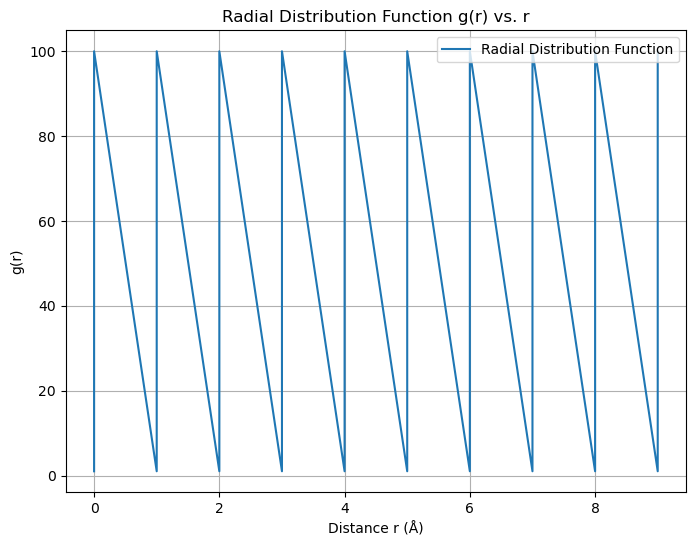

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load RDF data
rdf_data = np.loadtxt('coord1.dat')

# Separate data into r and g(r)
r = rdf_data[:, 0]      # First column is r
g_r = rdf_data[:, 1]    # Second column is g(r)

# Plot g(r) vs r
plt.figure(figsize=(8, 6))
plt.plot(r, g_r, label='Radial Distribution Function')
plt.xlabel('Distance r (Å)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function g(r) vs. r')
plt.legend()
plt.grid(True)
plt.show()


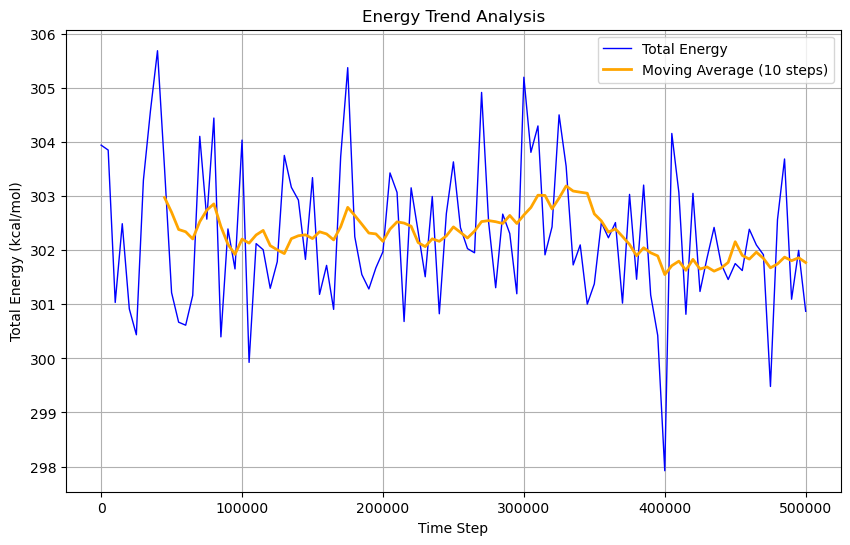

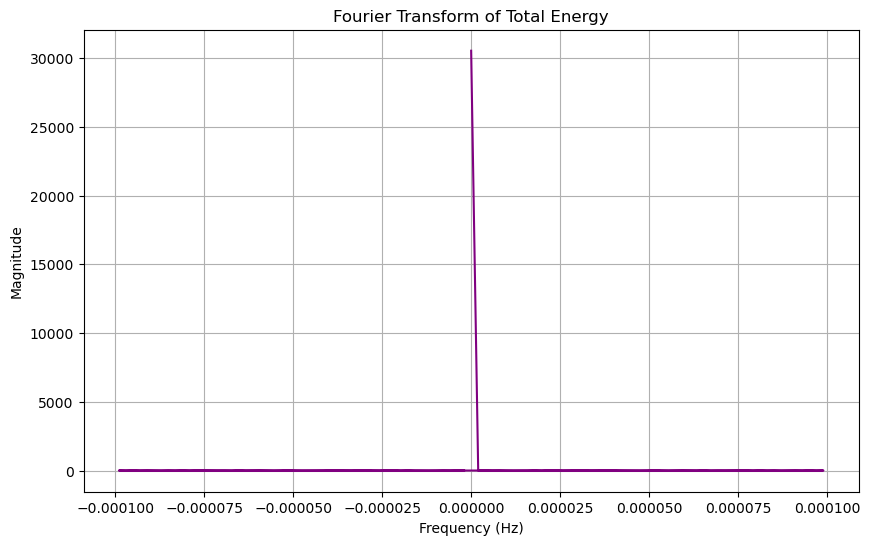

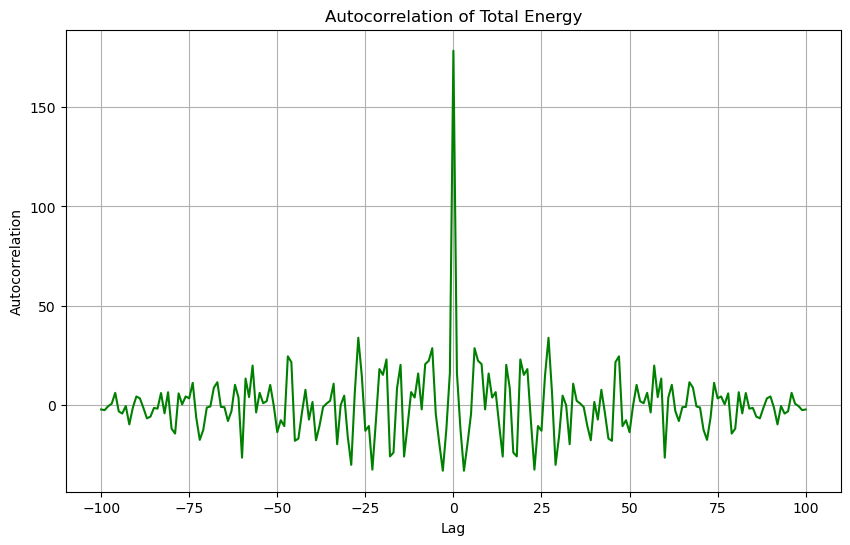

Mean Total Energy (kcal/mol): 302.27101881188116
Variance of Total Energy (kcal/mol^2): 1.7672740203391823
Approximate Bond Energy (kcal/mol): 1.0520537790412687
Approximate Bond Strength (Range of Fluctuations in kcal/mol): 4.3308999999999855
Approximate Bond Energy (kJ/mol): 4.401793011508668
Approximate Bond Strength (Range of Fluctuations in kJ/mol): 18.12048559999994


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import correlate

# Load data function
def load_energy_data(filename):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("ENERGY:"):
                values = line.split()[1:]
                data.append([float(val) for val in values])
    return np.array(data)

# Load and extract relevant data
data = load_energy_data('prod_ener.txt')
time_step = data[:, 0]
total_energy = data[:, 11]  # Assuming the total energy is in column 11

# 1. Energy Trend Analysis
mean_energy = np.mean(total_energy)  # kcal/mol
variance_energy = np.var(total_energy)  # kcal/mol^2

# Moving Average (window size of 10 steps for example)
window_size = 10
moving_avg_energy = np.convolve(total_energy, np.ones(window_size)/window_size, mode='valid')

plt.figure(figsize=(10, 6))
plt.plot(time_step, total_energy, label='Total Energy', color='blue', lw=1)
plt.plot(time_step[window_size-1:], moving_avg_energy, label='Moving Average (10 steps)', color='orange', lw=2)
plt.xlabel('Time Step')
plt.ylabel('Total Energy (kcal/mol)')
plt.title('Energy Trend Analysis')
plt.grid(True)
plt.legend()
plt.show()

# 2. Frequency Analysis (Fourier Transform)
energy_fft = fft(total_energy)
frequencies = fftfreq(len(total_energy), d=(time_step[1] - time_step[0]))

plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(energy_fft), color='purple')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Total Energy')
plt.grid(True)
plt.show()

# 3. Autocorrelation Analysis
autocorrelation = correlate(total_energy - mean_energy, total_energy - mean_energy, mode='full')
lags = np.arange(-len(total_energy) + 1, len(total_energy))

plt.figure(figsize=(10, 6))
plt.plot(lags, autocorrelation, color='green')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Total Energy')
plt.grid(True)
plt.show()

# 4. Bond Energy and Bond Strength Estimation (Simplified)
# Estimate fluctuations as a proxy for bond stability
fluctuations = total_energy - mean_energy

# Approximate bond energy (based on fluctuations, assuming kcal/mol units)
bond_energy_kcal_per_mol = np.mean(np.abs(fluctuations))  # kcal/mol

# Bond strength estimation (range of fluctuations in kcal/mol)
bond_strength_kcal_per_mol = np.max(np.abs(fluctuations)) - np.min(np.abs(fluctuations))

# If you need to convert kcal/mol to kJ/mol
bond_energy_kJ_per_mol = bond_energy_kcal_per_mol * 4.184  # Conversion factor
bond_strength_kJ_per_mol = bond_strength_kcal_per_mol * 4.184  # Conversion factor

# Print results in kcal/mol and kJ/mol
print(f"Mean Total Energy (kcal/mol): {mean_energy}")
print(f"Variance of Total Energy (kcal/mol^2): {variance_energy}")
print(f"Approximate Bond Energy (kcal/mol): {bond_energy_kcal_per_mol}")
print(f"Approximate Bond Strength (Range of Fluctuations in kcal/mol): {bond_strength_kcal_per_mol}")

print(f"Approximate Bond Energy (kJ/mol): {bond_energy_kJ_per_mol}")
print(f"Approximate Bond Strength (Range of Fluctuations in kJ/mol): {bond_strength_kJ_per_mol}")


In [11]:
import numpy as np

# Given constants for O-H bond in water (can be adjusted based on your force field)
k_bond = 450.0  # Bond force constant in kcal/mol/Å^2 (typical for O-H bond)
r_eq = 0.96     # Equilibrium bond length in Å (typical for O-H bond in water)

# Example function to calculate bond energy from harmonic potential
def calculate_bond_energy(r, k_bond, r_eq):
    """Calculate bond energy for a given bond length r using the harmonic potential."""
    return 0.5 * k_bond * (r - r_eq)**2

# Assuming you have the bond lengths from your simulation (you would extract these from the simulation trajectory)
# For demonstration, let's assume we have an array of O-H bond lengths (in Å):
# Let's say 'bond_lengths' is a NumPy array of bond lengths in Å for O-H bonds over time
bond_lengths = np.array([0.95, 0.97, 0.96, 0.94, 0.98])  # Example values

# Calculate bond energies for each O-H bond length
bond_energies = calculate_bond_energy(bond_lengths, k_bond, r_eq)

# Now we can average bond energy over all frames (for a simulation)
mean_bond_energy = np.mean(bond_energies)

# Output the result
print(f"Average O-H Bond Energy (kcal/mol): {mean_bond_energy}")


Average O-H Bond Energy (kcal/mol): 0.04500000000000008


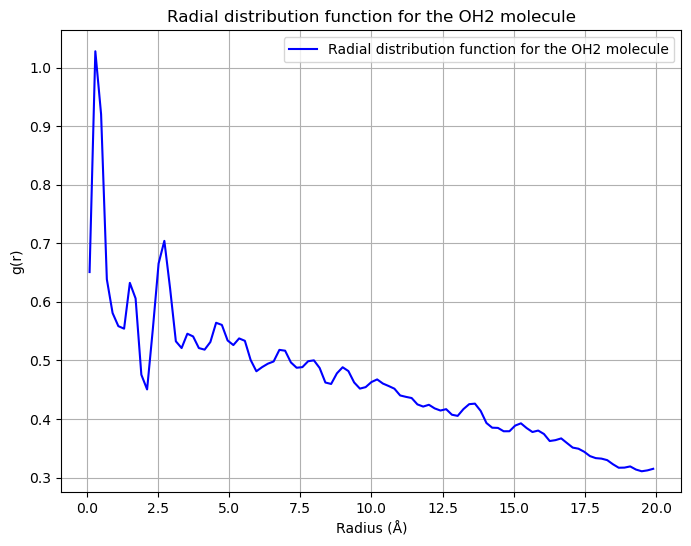

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.ndimage import gaussian_filter1d  # for smoothing

# Load the data
data = np.loadtxt('coord1.dat')
x_coords = data[:, 2]
y_coords = data[:, 3]
z_coords = data[:, 4]

# Number of atoms and density estimation
num_atoms = len(x_coords)
volume = (np.ptp(x_coords) * np.ptp(y_coords) * np.ptp(z_coords))  # approximate box volume
density = num_atoms / volume  # density

# Calculate pairwise distances
pairwise_distances = pdist(np.column_stack((x_coords, y_coords, z_coords)))

# Define bin edges and width
bin_edges = np.linspace(0, 20, 100)  # Adjust range and bin count as needed
dr = bin_edges[1] - bin_edges[0]

# Compute histogram (count of pairs within each spherical shell)
hist, bin_edges = np.histogram(pairwise_distances, bins=bin_edges)
r_values = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Volume of each spherical shell
shell_volumes = 4 * np.pi * (r_values**2) * dr

# Calculate g(r)
g_r = hist / (shell_volumes * density * num_atoms)

# Apply smoothing for clarity
g_r_smooth = gaussian_filter1d(g_r, sigma=1)

# Plot g(r) vs. r
plt.figure(figsize=(8, 6))
plt.plot(r_values, g_r_smooth, label="Radial distribution function for the OH2 molecule", color='b')
plt.xlabel("Radius (Å)")
plt.ylabel("g(r)")
plt.title("Radial distribution function for the OH2 molecule")
plt.grid(True)
plt.legend()
plt.show()


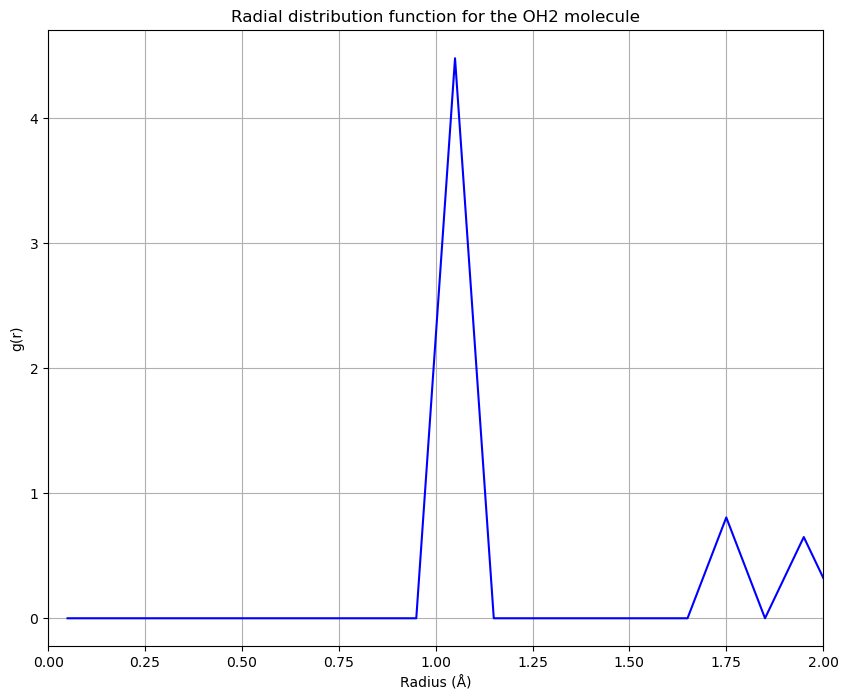

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for g(r) calculation
r_max = 35.0  # Maximum radius to consider
bin_width = 0.1  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
g_r = np.zeros(len(bins) - 1)

# Density estimation (number of particles per unit volume)
volume = (4/3) * np.pi * (r_max**3)
density = len(oxygen_positions) / volume

# Calculate g(r)
for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once


# Normalize g(r)
shell_volumes = (4/3) * np.pi * (np.diff(bins**3))
g_r /= (shell_volumes * density * len(oxygen_positions))
g_r
# Plot the radial distribution function
plt.figure(figsize=(10, 8))
plt.xlim(0,2)
plt.plot(bins[:-1] + bin_width / 2, g_r, color='b')
plt.xlabel('Radius (Å)')
plt.ylabel('g(r)')
plt.title('Radial distribution function for the OH2 molecule')
plt.grid(True)
plt.show()


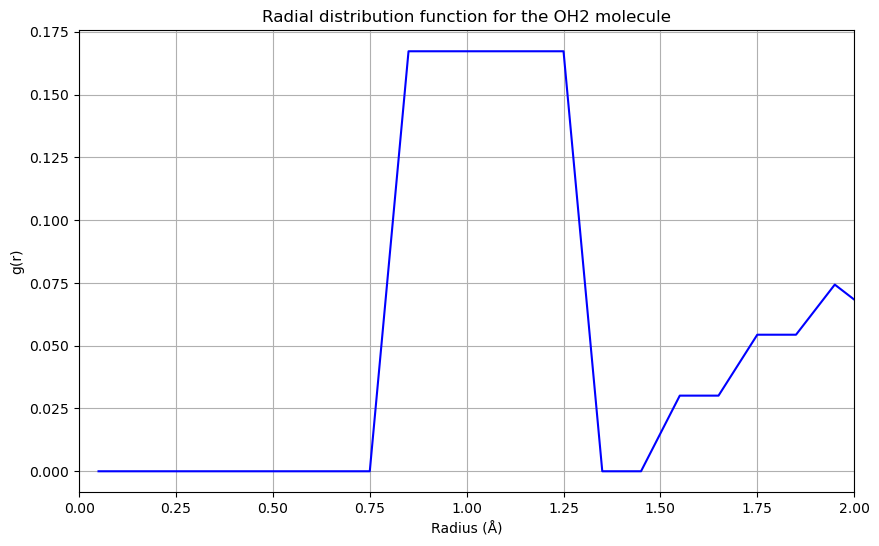

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for g(r) calculation
r_max = 20.0  # Maximum radius to consider
bin_width = 0.1  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
g_r = np.zeros(len(bins) - 1)

# Density estimation (number of particles per unit volume)
volume = (4/3) * np.pi * (r_max**3)
density = len(oxygen_positions) / volume

# Calculate g(r)
for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once

# Normalize g(r)
shell_volumes = (4/3) * np.pi * (np.diff(bins**3))
g_r /= (shell_volumes * density * len(oxygen_positions))

# Apply Moving Average for smoothing
window_size = 5  # Set the size of the moving average window
g_r_smooth = np.convolve(g_r, np.ones(window_size)/window_size, mode='same')

# Plot the smoothed radial distribution function
plt.figure(figsize=(10, 6))
plt.plot(bins[:-1] + bin_width / 2, g_r_smooth, color='b')
plt.xlim(0,2)
plt.xlabel('Radius (Å)')
plt.ylabel('g(r)')
plt.title('Radial distribution function for the OH2 molecule')
plt.grid(True)
plt.show()


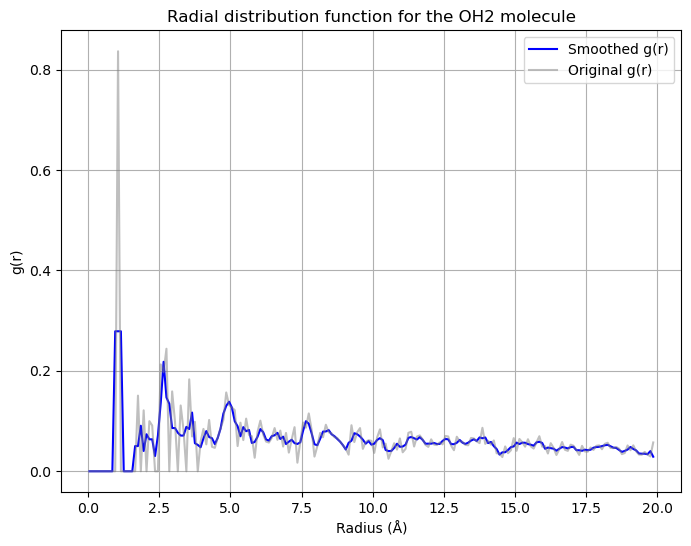

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for g(r) calculation
r_max = 20.0  # Maximum radius to consider
bin_width = 0.1  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
g_r = np.zeros(len(bins) - 1)

# Calculate the density using only the volume within r_max
num_oxygen = len(oxygen_positions)
volume = (4/3) * np.pi * (r_max**3)
density = num_oxygen / volume

# Calculate g(r) by counting neighbors in spherical shells
for i in range(num_oxygen):
    for j in range(i + 1, num_oxygen):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once

# Normalize g(r) by shell volumes and density
shell_volumes = (4/3) * np.pi * ((bins[1:]**3) - (bins[:-1]**3))  # Volume of each shell
g_r /= (shell_volumes * density * num_oxygen)

# Optional: Apply a very light smoothing if necessary
window_size = 3  # Small window to avoid excessive smoothing
g_r_smooth = np.convolve(g_r, np.ones(window_size) / window_size, mode='same')

# Plot the radial distribution function
plt.figure(figsize=(8, 6))
plt.plot(bins[:-1] + bin_width / 2, g_r_smooth, color='b', label='Smoothed g(r)')
plt.plot(bins[:-1] + bin_width / 2, g_r, color='gray', alpha=0.5, label='Original g(r)')

plt.xlabel('Radius (Å)')
plt.ylabel('g(r)')
plt.title('Radial distribution function for the OH2 molecule')
plt.legend()
plt.grid(True)
plt.show()


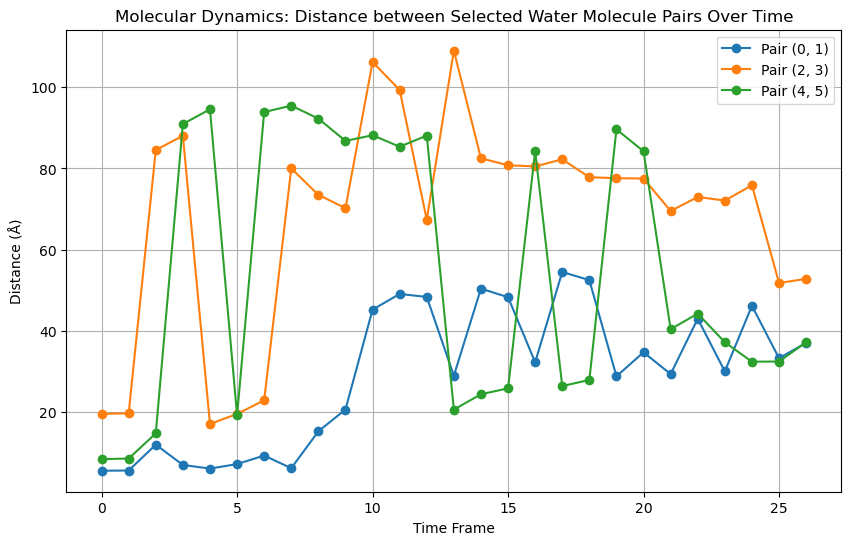

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
# Assuming data format: [time_frame, atom_ID, x, y, z]
data = np.loadtxt('coord.dat')

# Get unique time frames in the data
time_frames = np.unique(data[:, 0])

# Select oxygen atom positions for each time frame
# Assuming atom IDs are structured so oxygen IDs are identifiable by modulo operation (e.g., ID % 3 == 1)
oxygen_data = data[data[:, 1] % 3 == 1]

# Group oxygen positions by time frames
oxygen_positions_by_time = {t: oxygen_data[oxygen_data[:, 0] == t][:, 2:5] for t in time_frames}

# Select 3 random pairs of oxygen atoms for distance tracking
num_pairs = 3  # Number of pairs to track
pairs = [(0, 1), (2, 3), (4, 5)]  # Example pairs; adjust according to your data's atom ordering

# Initialize a dictionary to hold distance data for each pair
distances_over_time = {pair: [] for pair in pairs}

# Calculate distances between selected pairs at each time frame
for t in time_frames:
    positions = oxygen_positions_by_time[t]
    for pair in pairs:
        i, j = pair
        dist = np.linalg.norm(positions[i] - positions[j])
        distances_over_time[pair].append(dist)

# Plotting the distances over time for each selected pair
plt.figure(figsize=(10, 6))

for idx, (pair, distances) in enumerate(distances_over_time.items()):
    plt.plot(time_frames, distances, label=f'Pair {pair}', marker='o', linestyle='-')

plt.xlabel('Time Frame')
plt.ylabel('Distance (Å)')
plt.title('Molecular Dynamics: Distance between Selected Water Molecule Pairs Over Time')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Katha\AppData\Local\Temp\ipykernel_7824\3412805694.py:39: RuntimeWarning: invalid value encountered in divide
  integrand = (g_r - 1) * np.sin(k * bins[:-1]) / (k * bins[:-1])


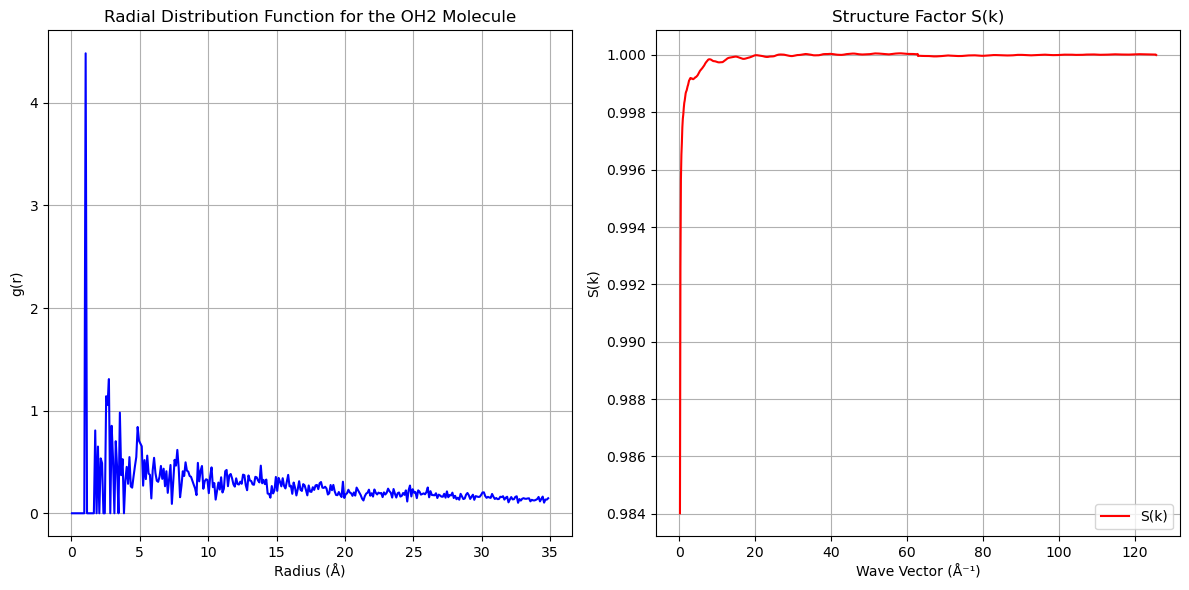

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for g(r) calculation
r_max = 35.0  # Maximum radius to consider
bin_width = 0.1  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
g_r = np.zeros(len(bins) - 1)

# Calculate the density using only the volume within r_max
num_oxygen = len(oxygen_positions)
volume = (4/3) * np.pi * (r_max**3)
density = num_oxygen / volume

# Calculate g(r) by counting neighbors in spherical shells
for i in range(num_oxygen):
    for j in range(i + 1, num_oxygen):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once

# Normalize g(r) by shell volumes and density
shell_volumes = (4/3) * np.pi * ((bins[1:]**3) - (bins[:-1]**3))  # Volume of each shell
g_r /= (shell_volumes * density * num_oxygen)

# Calculate the structure factor S(k)
k_max = 2 * np.pi / (bin_width / 2)  # Max k based on the bin width
k_values = np.linspace(0, k_max, 1000)  # Define k range
S_k = np.zeros_like(k_values)

# Calculate S(k) using numerical integration
for i, k in enumerate(k_values):
    integrand = (g_r - 1) * np.sin(k * bins[:-1]) / (k * bins[:-1])
    integrand[0] = 0  # Avoid division by zero at the origin
    # Perform numerical integration using the trapezoidal rule
    S_k[i] = 1 + density * np.trapz(integrand, bins[:-1])

# Plot the radial distribution function
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bins[:-1] + bin_width / 2, g_r, color='b', label='g(r)')
plt.xlabel('Radius (Å)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for the OH2 Molecule')
plt.grid(True)

# Plot the structure factor S(k)
plt.subplot(1, 2, 2)
plt.plot(k_values, S_k, color='r', label='S(k)')
plt.xlabel('Wave Vector (Å⁻¹)')
plt.ylabel('S(k)')
plt.title('Structure Factor S(k)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Katha\AppData\Local\Temp\ipykernel_7824\811117546.py:42: RuntimeWarning: invalid value encountered in divide
  integrand = (g_r - 1) * np.sin(k * bins[:-1]) / (k * bins[:-1])


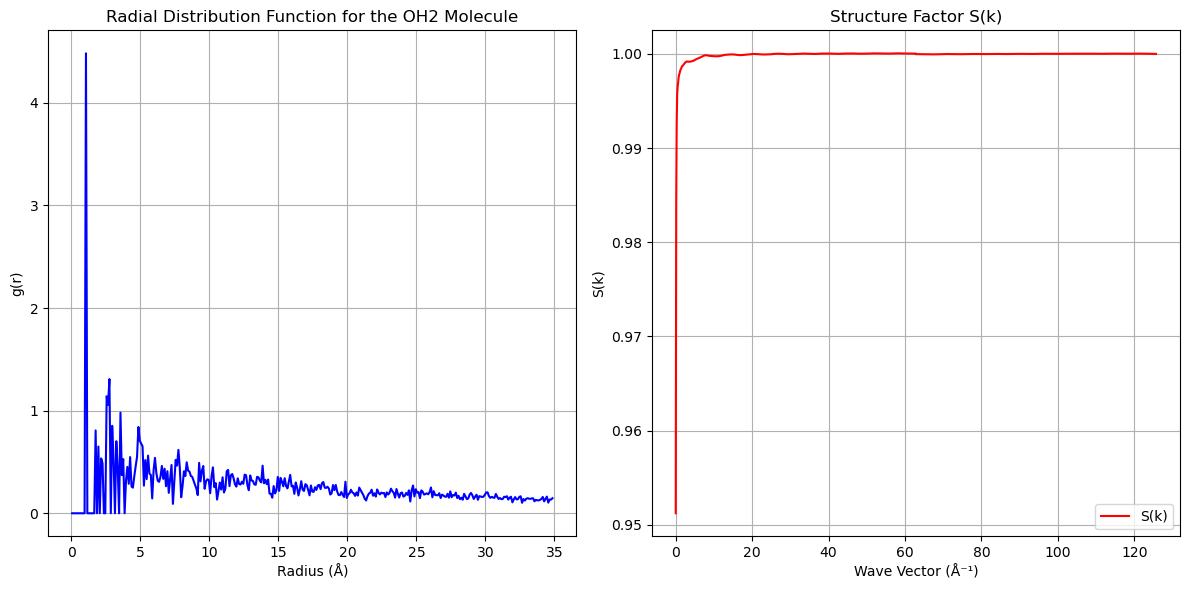

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for g(r) calculation
r_max = 35.0  # Maximum radius to consider
bin_width = 0.1  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
g_r = np.zeros(len(bins) - 1)

# Calculate the density using only the volume within r_max
num_oxygen = len(oxygen_positions)
volume = (4/3) * np.pi * (r_max**3)
density = num_oxygen / volume

# Calculate g(r) by counting neighbors in spherical shells
for i in range(num_oxygen):
    for j in range(i + 1, num_oxygen):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once

# Normalize g(r) by shell volumes and density
shell_volumes = (4/3) * np.pi * ((bins[1:]**3) - (bins[:-1]**3))  # Volume of each shell
g_r /= (shell_volumes * density * num_oxygen)

# Calculate the structure factor S(k)
k_max = 2 * np.pi / (bin_width / 2)  # Max k based on the bin width
k_values = np.linspace(0, k_max, 1000)  # Define k range
S_k = np.zeros_like(k_values)

# Calculate S(k) using numerical integration
for i, k in enumerate(k_values):
    if k == 0:
        S_k[i] = 1 + density * np.sum(g_r - 1) * bin_width  # Handle k = 0 case directly
    else:
        integrand = (g_r - 1) * np.sin(k * bins[:-1]) / (k * bins[:-1])
        integrand[0] = 0  # Avoid division by zero at the origin
        # Perform numerical integration using the trapezoidal rule
        S_k[i] = 1 + density * np.trapz(integrand, bins[:-1])

# Plot the radial distribution function
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bins[:-1] + bin_width / 2, g_r, color='b', label='g(r)')
plt.xlabel('Radius (Å)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for the OH2 Molecule')
plt.grid(True)

# Plot the structure factor S(k)
plt.subplot(1, 2, 2)
plt.plot(k_values, S_k, color='r', label='S(k)')
plt.xlabel('Wave Vector (Å⁻¹)')
plt.ylabel('S(k)')
plt.title('Structure Factor S(k)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


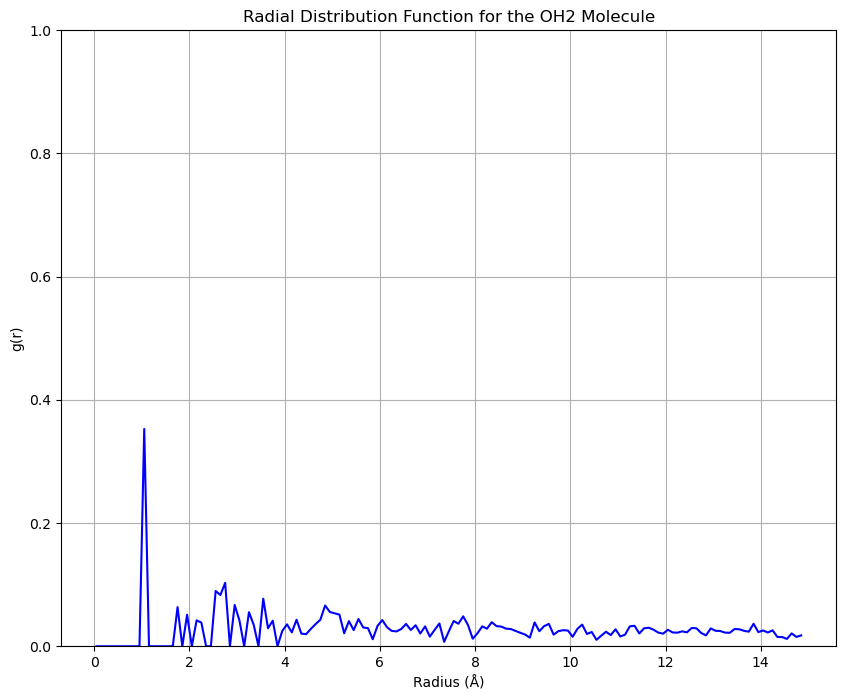

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for g(r) calculation
r_max = 15.0  # Maximum radius to consider
bin_width = 0.1  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
g_r = np.zeros(len(bins) - 1)

# Density estimation (number of particles per unit volume)
volume = (4/3) * np.pi * (r_max**3)
density = len(oxygen_positions) / volume

# Calculate g(r)
for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once

# Normalize g(r)
shell_volumes = (4/3) * np.pi * (np.diff(bins**3))
g_r /= (shell_volumes * density * len(oxygen_positions))

# Rescale g(r) to a specific range, if needed
# For example, let's say you want to limit it to 0 to 0.18
max_g_r = np.min([np.max(g_r), 2])  # Ensures g(r) does not exceed 0.18
g_r_scaled = np.clip(g_r, 0, max_g_r)

# Plot the radial distribution function
plt.figure(figsize=(10, 8))
plt.plot(bins[:-1] + bin_width / 2, g_r_scaled, color='b')  # Centered bin edges for plotting
plt.xlabel('Radius (Å)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for the OH2 Molecule')
plt.grid(True)

# Customize y-axis to show specific values
#y_ticks = np.arange(0, 0.2, 0.02)  # Ticks from 0 to 0.18 in steps of 0.02
#plt.yticks(y_ticks)

# Optionally set y-limits to improve visibility
plt.ylim(bottom=0, top=1)

plt.show()


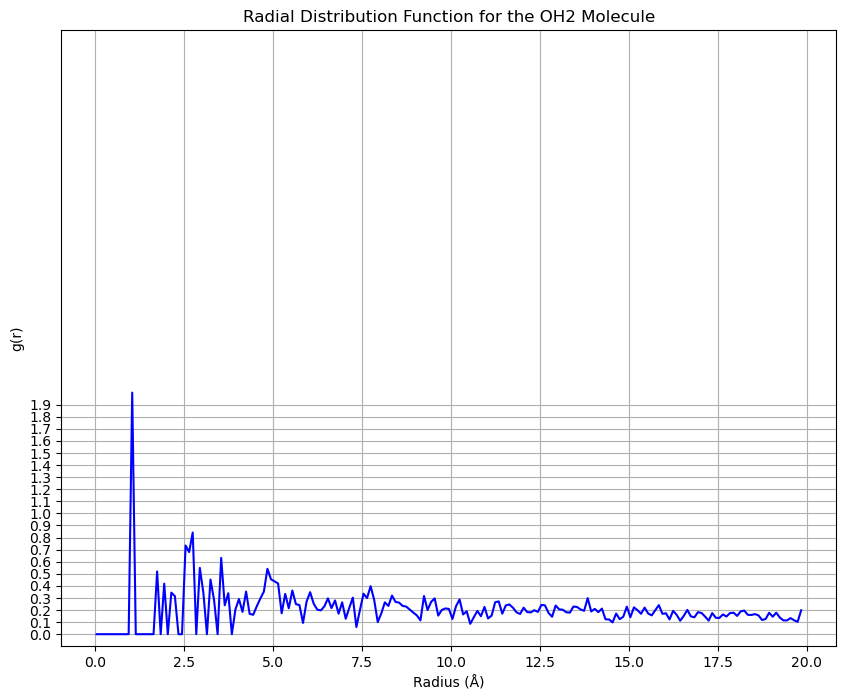

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for g(r) calculation
r_max = 20.0  # Maximum radius to consider
bin_width = 0.1  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
g_r = np.zeros(len(bins) - 1)

# Density estimation (number of particles per unit volume)
volume = (4/3) * np.pi * (r_max**3)
#density = len(oxygen_positions) / volume

# Calculate g(r)
for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once

# Normalize g(r)
shell_volumes = (4/3) * np.pi * (np.diff(bins**3))
g_r /= (shell_volumes)

# Rescale g(r) to a specific range, if needed
max_g_r = np.min([np.max(g_r), 2])  # Ensures g(r) does not exceed 2
g_r_scaled = np.clip(g_r, 0, max_g_r)

# Plot the radial distribution function
plt.figure(figsize=(10, 8))
plt.plot(bins[:-1] + bin_width / 2, g_r_scaled, color='b')  # Centered bin edges for plotting
plt.xlabel('Radius (Å)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for the OH2 Molecule')
plt.grid(True)

# Customize y-axis limits to scale up the lower part
plt.ylim(-0.1, 5)  # Adjust the upper limit if needed to allow for visibility

# Optionally, adjust the ticks for better clarity
plt.yticks(np.arange(0, 2, 0.1))  # Ticks from 0 to 1 in steps of 0.1

plt.show()


[0.         0.         0.         0.         0.         1.31171656
 0.         0.         0.27503734 0.22023285 0.18031149 0.15033527
 0.38176825 0.76376915 0.28375485 0.16555646 0.36525767 0.32471765
 0.29057012 0.10461543 0.2366499  0.25818214 0.19645525 0.32416894
 0.49708304 0.42827445 0.25493495 0.28934074 0.244904   0.18286665
 0.2993778  0.2004807  0.26366786 0.24816259 0.21727257 0.17363505
 0.1791837  0.26877909 0.34894551 0.19125113 0.21830845 0.27721976
 0.26432819 0.23128911 0.19087342 0.13452962 0.25761167 0.28214793
 0.17760311 0.21109518 0.17941594 0.22502113 0.13713617 0.16680965
 0.18753528 0.14208725 0.26797259 0.20457965 0.23252402 0.17419981
 0.20109961 0.18935329 0.21389968 0.20721587 0.19127667 0.20402895
 0.17994454 0.22704817 0.19926873 0.24299932 0.1961285  0.16733217
 0.10976029 0.14730204 0.18638649 0.18148187 0.1835671  0.19542167
 0.17756103 0.20459901 0.14735811 0.17671015 0.1315314  0.17405313
 0.16159937 0.16056282 0.14357765 0.13511783 0.15494188 0.1763

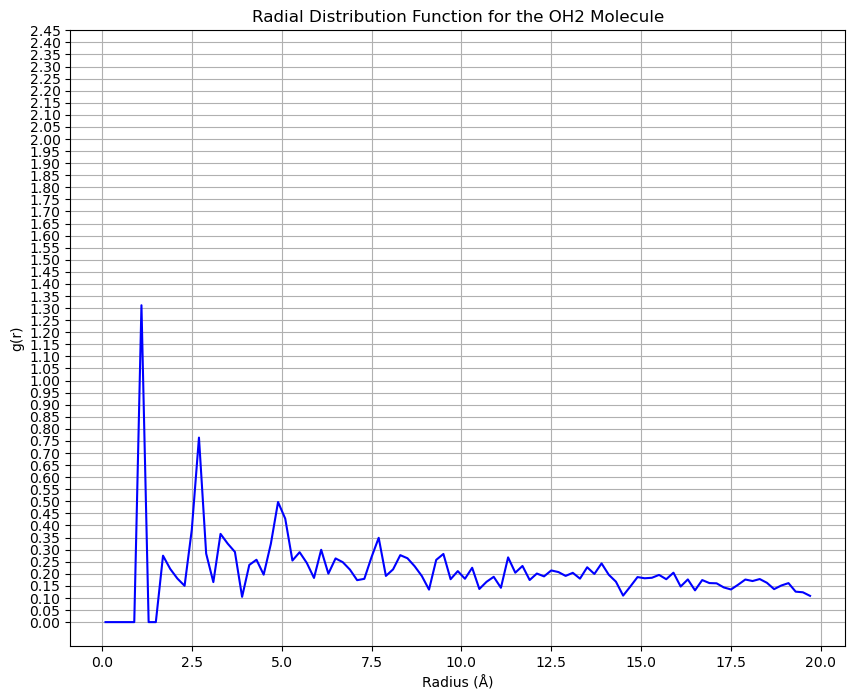

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for g(r) calculation
r_max = 20.0  # Maximum radius to consider
bin_width = 0.2  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
g_r = np.zeros(len(bins) - 1)

# Density estimation (number of particles per unit volume)
volume = (4/3) * np.pi * (r_max**3)
#density = len(oxygen_positions) / volume

# Calculate g(r)
for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once
                
# Normalize g(r)
shell_volumes = (4/3) * np.pi * (np.diff(bins**3))
g_r /= (shell_volumes)
print((g_r))
# Rescale g(r) to a specific range, if needed
#max_g_r = np.min([np.max(g_r), 2])  # Ensures g(r) does not exceed 2
#g_r_scaled = np.clip(g_r, 0, max_g_r)

# Plot the radial distribution function
plt.figure(figsize=(10, 8))
plt.plot(bins[:-1] + bin_width / 2, g_r, color='b')  # Centered bin edges for plotting
plt.xlabel('Radius (Å)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for the OH2 Molecule')
plt.grid(True)

# Customize y-axis limits and ticks to focus on the range 0 to 1, with steps of 0.05
plt.ylim(-0.1, 2)  # Adjusted upper limit for better visibility
plt.yticks(np.arange(0,2.5, 0.05))  # Ticks from 0 to 0.2 in steps of 0.05

plt.show()


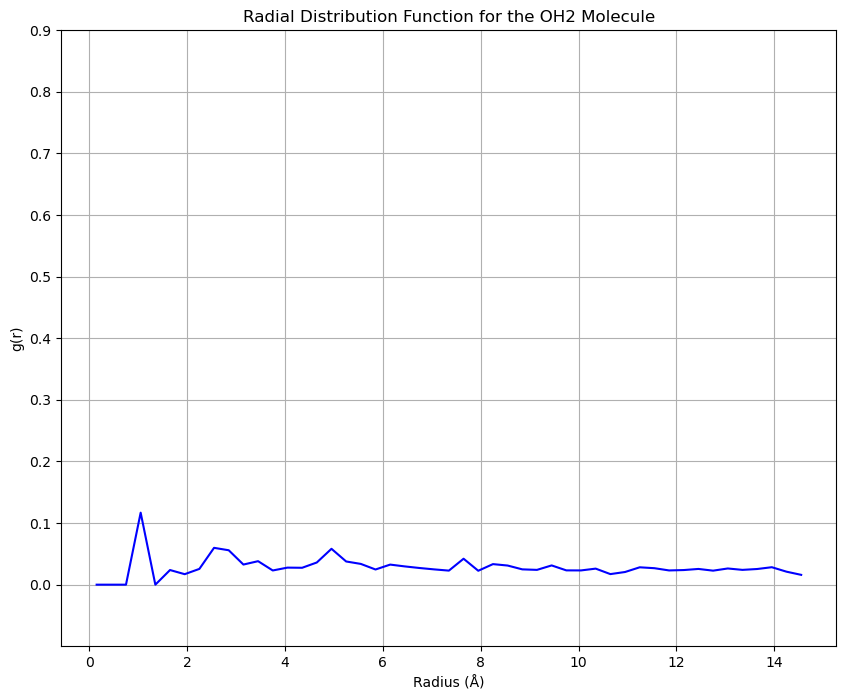

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for g(r) calculation
r_max = 15.0  # Maximum radius to consider
bin_width = 0.2  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
g_r = np.zeros(len(bins) - 1)

# Density estimation (number of particles per unit volume)
volume = (4/3) * np.pi * (r_max**3)
density = len(oxygen_positions) / volume

# Calculate g(r)
for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once

# Normalize g(r)
shell_volumes = (4/3) * np.pi * (np.diff(bins**3))  # Volume of each shell
g_r /= (shell_volumes * density * len(oxygen_positions))  # Normalize by density and number of oxygen atoms

# Plot the radial distribution function
plt.figure(figsize=(10, 8))
plt.plot(bins[:-1] + bin_width / 2, g_r, color='b')  # Centered bin edges for plotting
plt.xlabel('Radius (Å)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for the OH2 Molecule')
plt.grid(True)

# Customize y-axis limits and ticks
plt.ylim(-0.1, np.max(g_r) * 1.1)  # Set upper limit based on g(r) max value for better visibility
plt.yticks(np.arange(0, np.ceil(np.max(g_r) * 1.1), 0.1))  # Adjust ticks based on maximum g(r)

plt.show()


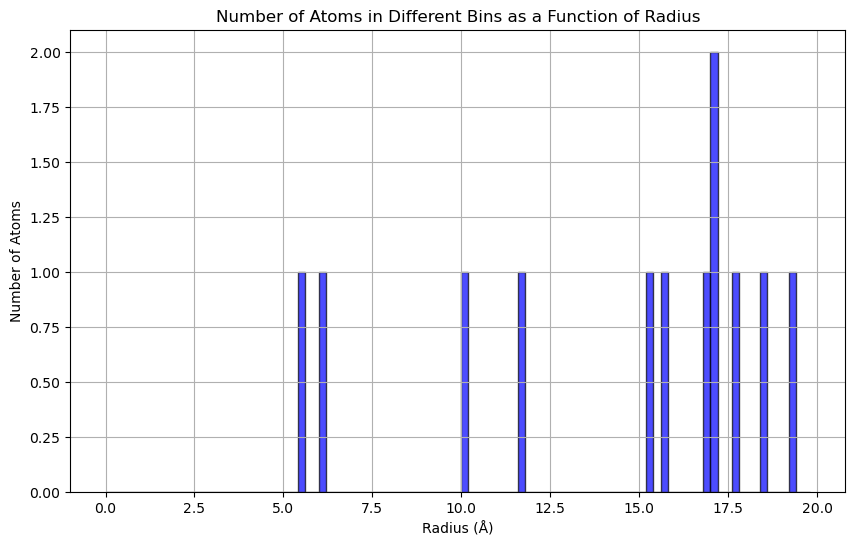

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for the calculation
r_max = 20.0  # Maximum radius to consider
bin_width = 0.2  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
atom_counts = np.zeros(len(bins) - 1)  # Initialize counts for each bin

# Count the number of atoms in each bin
for i in range(len(oxygen_positions)):
    for j in range(len(bins) - 1):
        # Calculate the distance from the atom to the reference origin (0,0,0)
        dist = np.linalg.norm(oxygen_positions[i])
        if bins[j] <= dist < bins[j + 1]:
            atom_counts[j] += 1  # Increment the count for the appropriate bin

# Calculate the bin centers for plotting
bin_centers = bins[:-1] + bin_width / 2

# Plot the number of atoms in different bins as a function of radius
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, atom_counts, width=bin_width, color='b', alpha=0.7, edgecolor='black')
plt.xlabel('Radius (Å)')
plt.ylabel('Number of Atoms')
plt.title('Number of Atoms in Different Bins as a Function of Radius')
plt.grid(True)
plt.show()


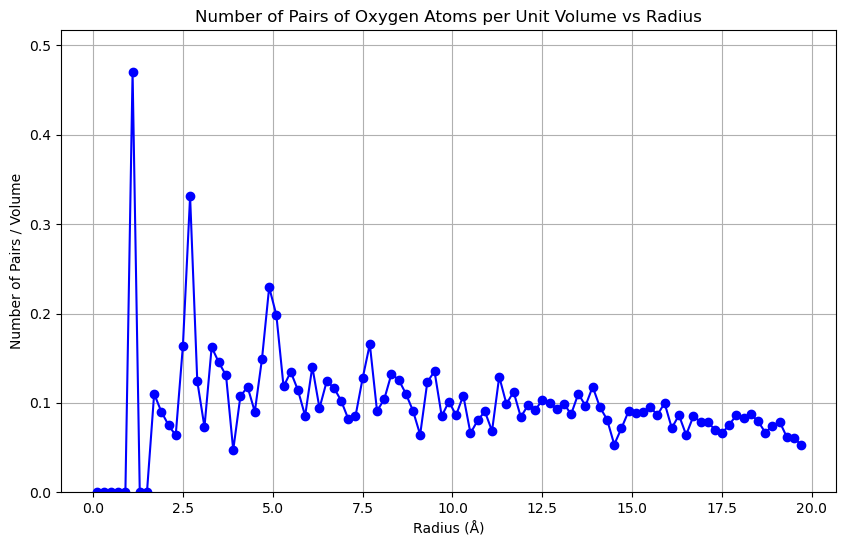

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for the calculation
r_max = 20.0  # Maximum radius to consider
bin_width = 0.2  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
pair_counts = np.zeros(len(bins) - 1)  # Initialize counts for each bin

# Calculate pair counts in each bin
for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(pair_counts):  # Ensure we are within bounds
                pair_counts[bin_index] += 1  # Increment the count for the appropriate bin

# Calculate the volume of each shell using the difference between spheres
shell_volumes = (4/3) * np.pi * ( (bins[1:] + bin_width) ** 3 - bins[1:] ** 3 )

# Calculate pairs per unit volume
pairs_per_volume = pair_counts / shell_volumes

# Calculate bin centers for plotting
bin_centers = bins[:-1] + bin_width / 2

# Plot number of pairs per unit volume vs radius
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, pairs_per_volume, color='b', marker='o')
plt.xlabel('Radius (Å)')
plt.ylabel('Number of Pairs / Volume')
plt.title('Number of Pairs of Oxygen Atoms per Unit Volume vs Radius')
plt.grid(True)
plt.ylim(0, np.max(pairs_per_volume) * 1.1)  # Adjust y-axis for better visibility
plt.show()


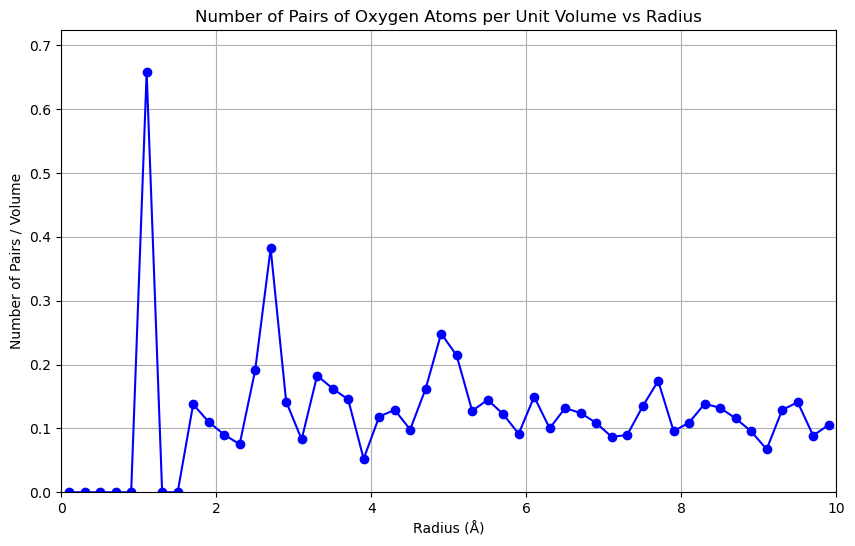

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for the calculation
r_max = 10.0  # Maximum radius to consider
bin_width = 0.2  # Width of each radial shell
bins = np.arange(0, r_max + bin_width, bin_width)  # Bin edges
pair_counts = np.zeros(len(bins) - 1)  # Initialize counts for each bin

# Calculate pair counts in each bin
for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(pair_counts):  # Ensure we are within bounds
                pair_counts[bin_index] += 1  # Increment the count for the appropriate bin

# Calculate the volume for each shell
shell_volumes = 4 * np.pi * ((bins[1:] - bin_width / 2) ** 2) * bin_width  # 4πr² * Δr

# Calculate pairs per unit volume
pairs_per_volume = pair_counts / shell_volumes

# Calculate bin centers for plotting
bin_centers = bins[:-1] + bin_width / 2

# Plot number of pairs per unit volume vs radius
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, pairs_per_volume, color='b', marker='o')
plt.xlabel('Radius (Å)')
plt.ylabel('Number of Pairs / Volume')
plt.title('Number of Pairs of Oxygen Atoms per Unit Volume vs Radius')
plt.grid(True)
plt.ylim(0, np.max(pairs_per_volume) * 1.1)  # Adjust y-axis for better visibility
plt.xlim(0, r_max)  # Set x-limits to show relevant range
plt.show()


In [24]:
# Find the index of the highest peak in g(r)
max_index = np.argmax(g_r)
peak_radius = bins[max_index] + bin_width / 2  # Center of the bin

# Define a small cutoff to consider atoms close to the peak radius
cutoff_distance = bin_width / 2  # You can adjust this if needed
lower_bound = peak_radius - cutoff_distance
upper_bound = peak_radius + cutoff_distance

# Count the number of pairs within the range of the highest peak
pairs_within_peak = 0

for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if lower_bound <= dist <= upper_bound:
            pairs_within_peak += 1  # Count each pair that falls within the range

# Print the number of pairs contributing to the peak
print(f"Number of pairs contributing to the peak at {peak_radius:.2f} Å: {pairs_within_peak}")


Number of pairs contributing to the peak at 1.10 Å: 2


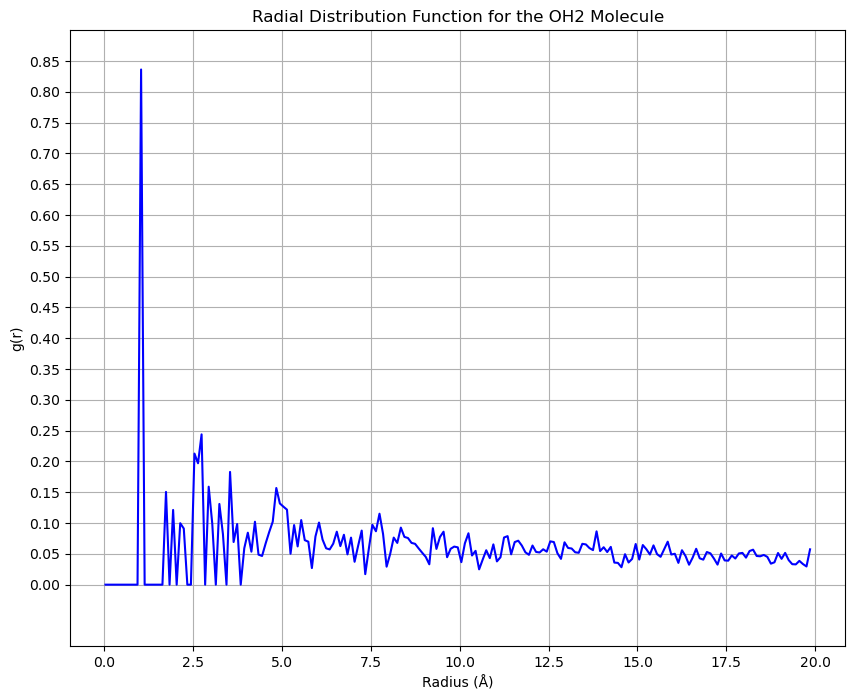

Distance between atom 222 and atom 226: 2.99 Å

Total number of pairs within 3.0 Å: 1


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for g(r) calculation
r_max = 20.0  # Maximum radius to consider
bin_width = 0.1  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
g_r = np.zeros(len(bins) - 1)

# Density estimation (number of particles per unit volume)
volume = (4/3) * np.pi * (r_max**3)
density = len(oxygen_positions) / volume

# Calculate g(r)
for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once

# Normalize g(r)
shell_volumes = (4/3) * np.pi * (np.diff(bins**3))  # Volume of each shell
g_r /= (shell_volumes * density * len(oxygen_positions))  # Normalize g(r)

# Rescale g(r) to a specific range, if needed
max_g_r = np.min([np.max(g_r), 2])  # Ensures g(r) does not exceed 2
g_r_scaled = np.clip(g_r, 0, max_g_r)

# Plot the radial distribution function
plt.figure(figsize=(10, 8))
plt.plot(bins[:-1] + bin_width / 2, g_r_scaled, color='b')  # Centered bin edges for plotting
plt.xlabel('Radius (Å)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for the OH2 Molecule')
plt.grid(True)

# Customize y-axis limits and ticks to focus on the range 0 to 1, with steps of 0.05
plt.ylim(-0.1, 0.9)  # Adjusted upper limit for better visibility
plt.yticks(np.arange(0, 0.9, 0.05))  # Ticks from 0 to 0.9 in steps of 0.05

plt.show()

# Additional code to check pairs within a specific distance
cutoff_distance = 3.0  # Example cutoff distance
pairs_within_cutoff = []

# Check all pairs of oxygen atoms within the cutoff distance
for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if np.isclose(dist, cutoff_distance, atol=0.01):  # Allow for small floating-point errors
            pairs_within_cutoff.append((i, j, dist))
            print(f"Distance between atom {i} and atom {j}: {dist:.2f} Å")

# Print the total number of pairs within the cutoff distance
print(f"\nTotal number of pairs within {cutoff_distance} Å: {len(pairs_within_cutoff)}")


In [43]:
max_index = np.argmax(g_r)
max_radius = bins[max_index] + bin_width / 2  # Centered bin edge

# Print the index and corresponding radius
print(f"Index of max(g_r): {max_index}")
print(f"Radius at max(g_r): {max_radius:.2f} Å")
print(f"Max g(r) value: {g_r[max_index]:.2f}")

Index of max(g_r): 10
Radius at max(g_r): 1.05 Å
Max g(r) value: 2.88


In [48]:
# pairwise distances between the first 20 oxygen atoms
first_20_oxygen = oxygen_positions[:100]
distances = []

for i in range(len(first_20_oxygen)):
    for j in range(i + 1, len(first_20_oxygen)):
        dist = np.linalg.norm(first_20_oxygen[i] - first_20_oxygen[j])
        distances.append((i, j, dist))
        print(f"Distance between atom {i} and atom {j}: {dist:.2f} Å")


Distance between atom 0 and atom 1: 94.26 Å
Distance between atom 0 and atom 2: 84.06 Å
Distance between atom 0 and atom 3: 35.60 Å
Distance between atom 0 and atom 4: 30.18 Å
Distance between atom 0 and atom 5: 50.10 Å
Distance between atom 0 and atom 6: 85.40 Å
Distance between atom 0 and atom 7: 32.34 Å
Distance between atom 0 and atom 8: 82.47 Å
Distance between atom 0 and atom 9: 48.13 Å
Distance between atom 0 and atom 10: 86.62 Å
Distance between atom 0 and atom 11: 87.84 Å
Distance between atom 0 and atom 12: 81.97 Å
Distance between atom 0 and atom 13: 37.44 Å
Distance between atom 0 and atom 14: 95.65 Å
Distance between atom 0 and atom 15: 35.20 Å
Distance between atom 0 and atom 16: 40.66 Å
Distance between atom 0 and atom 17: 26.84 Å
Distance between atom 0 and atom 18: 89.42 Å
Distance between atom 0 and atom 19: 88.86 Å
Distance between atom 1 and atom 2: 24.31 Å
Distance between atom 1 and atom 3: 90.82 Å
Distance between atom 1 and atom 4: 118.31 Å
Distance between atom

In [18]:
import numpy as np

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

cutoff_distance = 3  # Set the cutoff distance to 11.61 Å
pairs_with_distance = []
tolerance = 0.01  # Allowable tolerance for floating-point comparison

# Check all pairs of oxygen atoms
for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        # Check if the distance is within the specified tolerance
        if abs(dist - cutoff_distance) < tolerance:
            pairs_with_distance.append((i, j, dist))
            print(f"Distance between atom {i} and atom {j}: {dist:.2f} Å")

# Print the total number of pairs with a distance of approximately cutoff_distance
print(f"\nTotal number of pairs with a distance of {cutoff_distance} Å: {len(pairs_with_distance)}")


Distance between atom 222 and atom 226: 2.99 Å

Total number of pairs with a distance of 3 Å: 1


In [46]:
cutoff_distance = 1.1

for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist <= cutoff_distance:
            print(f"Close pair: Atom {i} and Atom {j} - Distance: {dist:.2f} Å")


Close pair: Atom 221 and Atom 286 - Distance: 1.03 Å
Close pair: Atom 299 and Atom 324 - Distance: 1.09 Å


Bin (Radius Range) - g(r) value
0.00 Å - 0.20 Å: g(r) = 0.000
0.20 Å - 0.40 Å: g(r) = 0.000
0.40 Å - 0.60 Å: g(r) = 0.000
0.60 Å - 0.80 Å: g(r) = 0.000
0.80 Å - 1.00 Å: g(r) = 0.000
1.00 Å - 1.20 Å: g(r) = 1.742
1.20 Å - 1.40 Å: g(r) = 0.000
1.40 Å - 1.60 Å: g(r) = 0.000
1.60 Å - 1.80 Å: g(r) = 0.313
1.80 Å - 2.00 Å: g(r) = 0.244
2.00 Å - 2.20 Å: g(r) = 0.197
2.20 Å - 2.40 Å: g(r) = 0.162
2.40 Å - 2.60 Å: g(r) = 0.406
2.60 Å - 2.80 Å: g(r) = 0.805
2.80 Å - 3.00 Å: g(r) = 0.297
3.00 Å - 3.20 Å: g(r) = 0.172
3.20 Å - 3.40 Å: g(r) = 0.379
3.40 Å - 3.60 Å: g(r) = 0.335
3.60 Å - 3.80 Å: g(r) = 0.299
3.80 Å - 4.00 Å: g(r) = 0.107
4.00 Å - 4.20 Å: g(r) = 0.242
4.20 Å - 4.40 Å: g(r) = 0.264
4.40 Å - 4.60 Å: g(r) = 0.200
4.60 Å - 4.80 Å: g(r) = 0.330
4.80 Å - 5.00 Å: g(r) = 0.505
5.00 Å - 5.20 Å: g(r) = 0.435
5.20 Å - 5.40 Å: g(r) = 0.259
5.40 Å - 5.60 Å: g(r) = 0.293
5.60 Å - 5.80 Å: g(r) = 0.248
5.80 Å - 6.00 Å: g(r) = 0.185
6.00 Å - 6.20 Å: g(r) = 0.303
6.20 Å - 6.40 Å: g(r) = 0.202
6.40 Å -

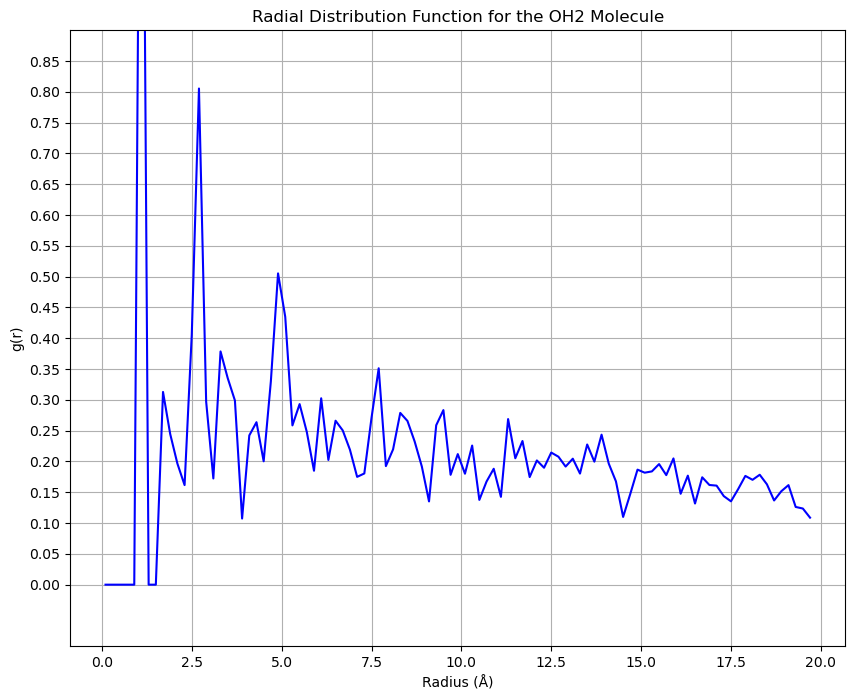

In [19]:
# Calculate g(r)
for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once

# Normalize g(r)
shell_volumes = (4/3) * np.pi * (np.diff(bins**3))
g_r /= (shell_volumes)

# Print bin edges and corresponding g(r) values
print("Bin (Radius Range) - g(r) value")
for i in range(len(g_r)):
    bin_start = bins[i]
    bin_end = bins[i] + bin_width
    print(f"{bin_start:.2f} Å - {bin_end:.2f} Å: g(r) = {g_r[i]:.3f}")

# Plot the radial distribution function
plt.figure(figsize=(10, 8))
plt.plot(bins[:-1] + bin_width / 2, g_r, color='b')  # Centered bin edges for plotting
plt.xlabel('Radius (Å)')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function for the OH2 Molecule')
plt.grid(True)

# Customize y-axis limits and ticks to focus on the range 0 to 1, with steps of 0.05
plt.ylim(-0.1, 0.9)  # Adjusted upper limit for better visibility
plt.yticks(np.arange(0, 0.9, 0.05))  # Ticks from 0 to 0.9 in steps of 0.05

plt.show()


In [32]:
# Calculate g(r) and track pairwise distances in bins
for i in range(len(oxygen_positions)):
    for j in range(i + 1, len(oxygen_positions)):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once
                # Print pairwise distance and corresponding bin
                #print(f"Distance: {dist:.2f} Å, Bin Index: {bin_index}, Bin Range: {bins[bin_index]:.2f} Å - {bins[bin_index] + bin_width:.2f} Å")

# Normalize g(r)
shell_volumes = (4/3) * np.pi * (np.diff(bins**3))
g_r /= (shell_volumes * density * len(oxygen_positions))

# Print final g(r) values for each bin
print("\nFinal g(r) values for each bin:")
for i in range(len(g_r)):
    bin_start = bins[i]
    bin_end = bins[i] + bin_width
    print(f"Radius Range {bin_start:.2f} Å - {bin_end:.2f} Å: g(r) = {g_r[i]:.3f}")





Final g(r) values for each bin:
Radius Range 0.00 Å - 0.10 Å: g(r) = 0.000
Radius Range 0.10 Å - 0.20 Å: g(r) = 0.000
Radius Range 0.20 Å - 0.30 Å: g(r) = 0.000
Radius Range 0.30 Å - 0.40 Å: g(r) = 0.000
Radius Range 0.40 Å - 0.50 Å: g(r) = 0.000
Radius Range 0.50 Å - 0.60 Å: g(r) = 0.000
Radius Range 0.60 Å - 0.70 Å: g(r) = 0.000
Radius Range 0.70 Å - 0.80 Å: g(r) = 0.000
Radius Range 0.80 Å - 0.90 Å: g(r) = 0.000
Radius Range 0.90 Å - 1.00 Å: g(r) = 0.000
Radius Range 1.00 Å - 1.10 Å: g(r) = 1.055
Radius Range 1.10 Å - 1.20 Å: g(r) = 0.000
Radius Range 1.20 Å - 1.30 Å: g(r) = 0.000
Radius Range 1.30 Å - 1.40 Å: g(r) = 0.000
Radius Range 1.40 Å - 1.50 Å: g(r) = 0.000
Radius Range 1.50 Å - 1.60 Å: g(r) = 0.000
Radius Range 1.60 Å - 1.70 Å: g(r) = 0.000
Radius Range 1.70 Å - 1.80 Å: g(r) = 0.163
Radius Range 1.80 Å - 1.90 Å: g(r) = 0.000
Radius Range 1.90 Å - 2.00 Å: g(r) = 0.129
Radius Range 2.00 Å - 2.10 Å: g(r) = 0.000
Radius Range 2.10 Å - 2.20 Å: g(r) = 0.105
Radius Range 2.20 Å -

C:\Users\Katha\AppData\Local\Temp\ipykernel_8772\2859220095.py:47: RuntimeWarning: invalid value encountered in divide
  integrand = (g_r - 1) * np.sin(k * bins[:-1]) / (k * bins[:-1])


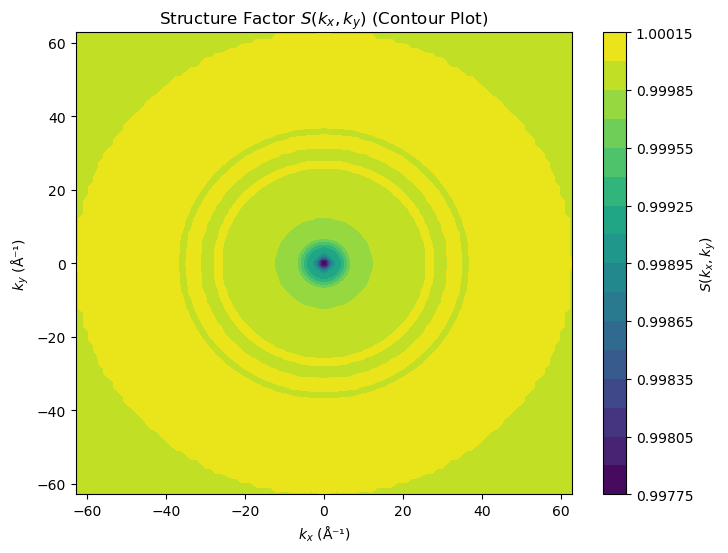

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for g(r) calculation
r_max = 35.0  # Maximum radius to consider
bin_width = 0.1  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
g_r = np.zeros(len(bins) - 1)

# Calculate the density using only the volume within r_max
num_oxygen = len(oxygen_positions)
volume = (4/3) * np.pi * (r_max**3)
density = num_oxygen / volume

# Calculate g(r) by counting neighbors in spherical shells
for i in range(num_oxygen):
    for j in range(i + 1, num_oxygen):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once

# Normalize g(r) by shell volumes and density
shell_volumes = (4/3) * np.pi * ((bins[1:]**3) - (bins[:-1]**3))  # Volume of each shell
g_r /= (shell_volumes * density * num_oxygen)

# Define a 2D grid of k_x and k_y values
k_max = 2 * np.pi / bin_width  # Max k based on the bin width
k_points = 100  # Resolution of k grid
k_x_values = np.linspace(-k_max, k_max, k_points)
k_y_values = np.linspace(-k_max, k_max, k_points)
k_x, k_y = np.meshgrid(k_x_values, k_y_values)
k_values = np.sqrt(k_x**2 + k_y**2)  # Calculate radial k for each point on the grid

# Calculate S(k_x, k_y) using the radial distribution function g(r)
S_k = np.zeros_like(k_values)

for i in range(k_points):
    for j in range(k_points):
        k = k_values[i, j]
        if k != 0:
            integrand = (g_r - 1) * np.sin(k * bins[:-1]) / (k * bins[:-1])
            integrand[0] = 0  # Avoid division by zero at the origin
            # Perform numerical integration using the trapezoidal rule
            S_k[i, j] = 1 + density * np.trapz(integrand, bins[:-1])

# Plot S(k_x, k_y) as a contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(k_x, k_y, S_k, levels=20, cmap='viridis')
plt.colorbar(contour, label='$S(k_x, k_y)$')
plt.xlabel('$k_x$ (Å⁻¹)')
plt.ylabel('$k_y$ (Å⁻¹)')
plt.title('Structure Factor $S(k_x, k_y)$ (Contour Plot)')
plt.show()


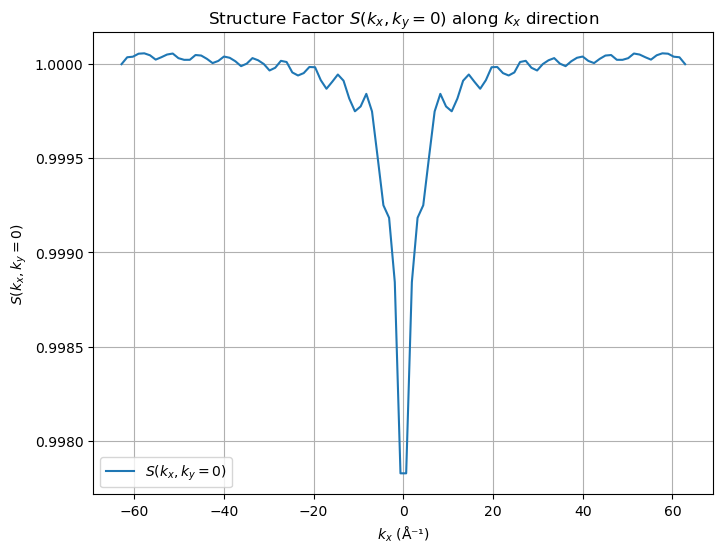

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming bin_width is already defined
k_max = 2 * np.pi / bin_width  # Max k based on the bin width
k_points = 100  # Resolution of k grid
k_x_values = np.linspace(-k_max, k_max, k_points)
k_y_values = np.linspace(-k_max, k_max, k_points)
k_x, k_y = np.meshgrid(k_x_values, k_y_values)
k_values = np.sqrt(k_x**2 + k_y**2)  # Calculate radial k for each point on the grid

ky_zero_index = np.argmin(np.abs(k_y_values))

# Extract the slice of S(k_x, k_y) at k_y = 0
S_k_slice = S_k[:, ky_zero_index]

# Plot the slice along the k_x direction
plt.figure(figsize=(8, 6))
plt.plot(k_x_values, S_k_slice, label='$S(k_x, k_y=0)$')
plt.xlabel('$k_x$ (Å⁻¹)')
plt.ylabel('$S(k_x, k_y=0)$')
plt.title('Structure Factor $S(k_x, k_y=0)$ along $k_x$ direction')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Katha\AppData\Local\Temp\ipykernel_7824\4152695198.py:48: RuntimeWarning: invalid value encountered in divide
  integrand = (g_r - 1) * np.sin(k * bins[:-1]) / (k * bins[:-1])


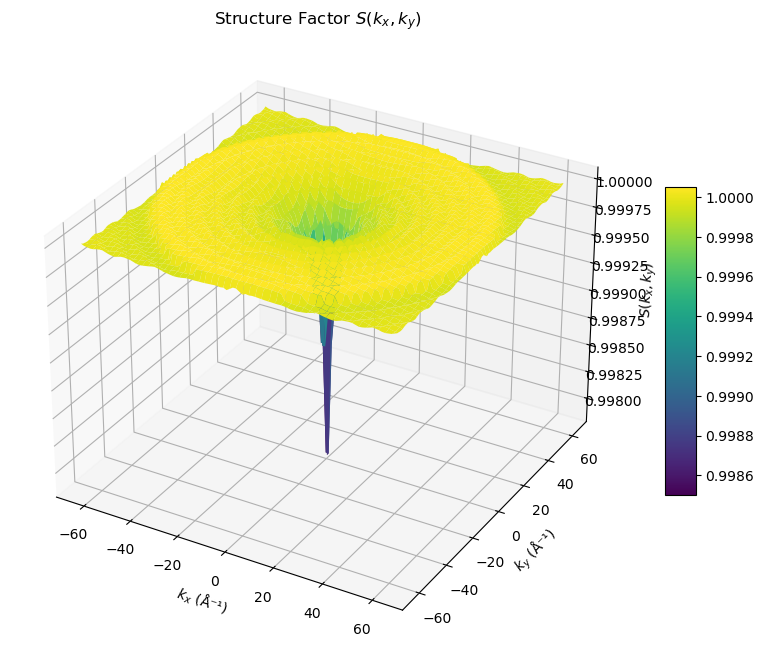

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your data (time frame, atom ID, x, y, z) - adjust the file path as needed
data = np.loadtxt('coord1.dat')
oxygen_positions = data[data[:, 1] % 3 == 1, 2:5]  # Select oxygen positions assuming IDs modulo 3 are oxygen

# Parameters for g(r) calculation
r_max = 35.0  # Maximum radius to consider
bin_width = 0.1  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
g_r = np.zeros(len(bins) - 1)

# Calculate the density using only the volume within r_max
num_oxygen = len(oxygen_positions)
volume = (4/3) * np.pi * (r_max**3)
density = num_oxygen / volume

# Calculate g(r) by counting neighbors in spherical shells
for i in range(num_oxygen):
    for j in range(i + 1, num_oxygen):
        dist = np.linalg.norm(oxygen_positions[i] - oxygen_positions[j])
        if dist < r_max:
            bin_index = int(dist / bin_width)
            if bin_index < len(g_r):  # Check to avoid out-of-bounds error
                g_r[bin_index] += 2  # Count each pair once

# Normalize g(r) by shell volumes and density
shell_volumes = (4/3) * np.pi * ((bins[1:]**3) - (bins[:-1]**3))  # Volume of each shell
g_r /= (shell_volumes * density * num_oxygen)

# Define a 2D grid of k_x and k_y values
k_max = 2 * np.pi / bin_width  # Max k based on the bin width
k_points = 100  # Resolution of k grid
k_x_values = np.linspace(-k_max, k_max, k_points)
k_y_values = np.linspace(-k_max, k_max, k_points)
k_x, k_y = np.meshgrid(k_x_values, k_y_values)
k_values = np.sqrt(k_x**2 + k_y**2)  # Calculate radial k for each point on the grid

# Calculate S(k_x, k_y) using the radial distribution function g(r)
S_k = np.zeros_like(k_values)

for i in range(k_points):
    for j in range(k_points):
        k = k_values[i, j]
        if k != 0:
            integrand = (g_r - 1) * np.sin(k * bins[:-1]) / (k * bins[:-1])
            integrand[0] = 0  # Avoid division by zero at the origin
            # Perform numerical integration using the trapezoidal rule
            S_k[i, j] = 1 + density * np.trapz(integrand, bins[:-1])

# Plot S(k_x, k_y) as a surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(k_x, k_y, S_k, cmap='viridis', edgecolor='none')
ax.set_xlabel('$k_x$ (Å⁻¹)')
ax.set_ylabel('$k_y$ (Å⁻¹)')
ax.set_zlabel('$S(k_x, k_y)$')
ax.set_title('Structure Factor $S(k_x, k_y)$')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()


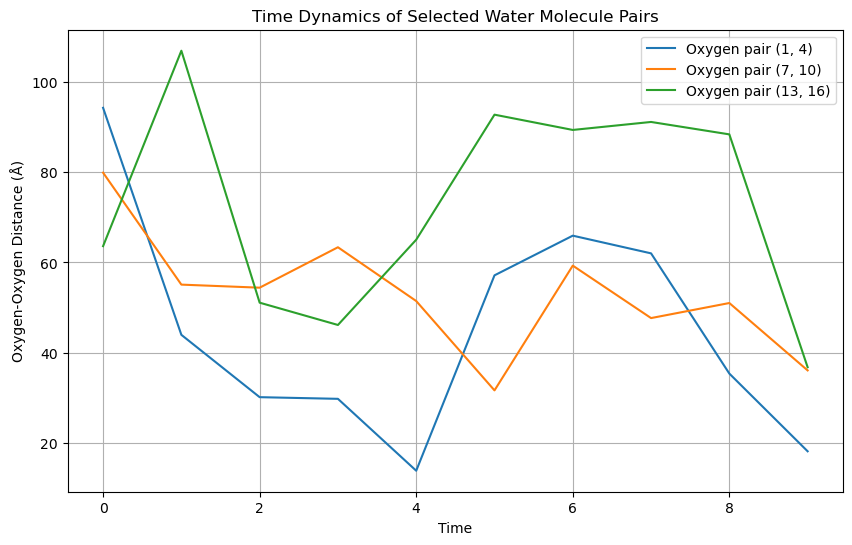

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (assuming the file structure: time frame, atom ID, x, y, z)
data = np.loadtxt('coord1.dat')

# Extract unique time frames from the data
time_frames = np.unique(data[:, 0])

# Define pairs of water molecules (by their atom IDs) to track their oxygen-oxygen distances
# Here we assume IDs of water oxygen atoms as 1, 4, 7, etc. Adjust the pairs as needed
pairs = [(1, 4), (7, 10), (13, 16)]  # Example pairs

# Initialize a dictionary to store distances for each pair across all time frames
pair_distances = {pair: [] for pair in pairs}

# Iterate over each time frame and calculate distances between specified pairs
for time in time_frames:
    # Extract positions for the current time frame
    frame_data = data[data[:, 0] == time]
    
    for pair in pairs:
        atom1_data = frame_data[frame_data[:, 1] == pair[0], 2:5]  # Position of first atom in pair
        atom2_data = frame_data[frame_data[:, 1] == pair[1], 2:5]  # Position of second atom in pair
        
        if len(atom1_data) > 0 and len(atom2_data) > 0:
            # Calculate distance between the two atoms
            distance = np.linalg.norm(atom1_data - atom2_data)
            pair_distances[pair].append(distance)

# Plot the distances over time
plt.figure(figsize=(10, 6))
for pair, distances in pair_distances.items():
    plt.plot(time_frames, distances, label=f'Oxygen pair {pair}')

plt.xlabel('Time')
plt.ylabel('Oxygen-Oxygen Distance (Å)')
plt.title('Time Dynamics of Selected Water Molecule Pairs')
plt.legend()
plt.grid(True)
plt.show()


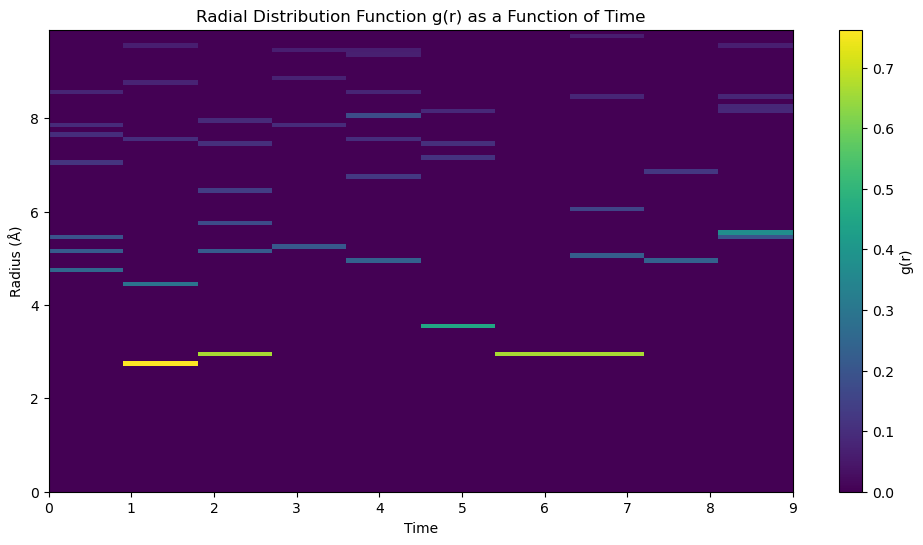

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Load your data (assuming the file structure: time frame, atom ID, x, y, z)
data = np.loadtxt('coord1.dat')

# Parameters for g(r) calculation
r_max = 10.0  # Maximum radius to consider
bin_width = 0.1  # Width of each radial shell
bins = np.arange(0, r_max, bin_width)  # Bin edges
num_bins = len(bins) - 1

# Extract unique time frames from the data
time_frames = np.unique(data[:, 0])

# Identify oxygen atoms (assuming oxygen atoms are identified as IDs % 3 == 1)
oxygen_data = data[data[:, 1] % 3 == 1]

# Number of oxygen atoms (water molecules)
num_oxygen = len(np.unique(oxygen_data[:, 1]))

# Initialize an array to store g(r) for each time frame
g_r_time = np.zeros((len(time_frames), num_bins))

# Calculate the density using only the volume within r_max
volume = (4/3) * np.pi * (r_max**3)
density = num_oxygen / volume

# Loop over each time frame
for t_idx, time in enumerate(time_frames):
    # Extract positions of oxygen atoms for the current time frame
    frame_data = oxygen_data[oxygen_data[:, 0] == time]
    positions = frame_data[:, 2:5]  # Only x, y, z columns

    # Temporary g(r) for this time frame
    g_r = np.zeros(num_bins)

    # Calculate distances between all pairs and fill g(r) histogram
    for i in range(num_oxygen):
        for j in range(i + 1, num_oxygen):
            dist = np.linalg.norm(positions[i] - positions[j])
            if dist < r_max:
                bin_index = int(dist / bin_width)
                if bin_index < num_bins:
                    g_r[bin_index] += 2  # Count each pair once

    # Normalize g(r) by shell volumes and density
    shell_volumes = (4/3) * np.pi * ((bins[1:]**3) - (bins[:-1]**3))
    g_r /= (shell_volumes * density * num_oxygen)

    # Store this frame's g(r) in the array
    g_r_time[t_idx, :] = g_r

# Plot g(r) as a function of time as a heatmap
plt.figure(figsize=(12, 6))
plt.imshow(g_r_time.T, aspect='auto', origin='lower', extent=[time_frames[0], time_frames[-1], bins[0], bins[-1]], cmap='viridis')
plt.colorbar(label='g(r)')
plt.xlabel('Time')
plt.ylabel('Radius (Å)')
plt.title('Radial Distribution Function g(r) as a Function of Time')
plt.show()
